# ==== INTERACTIVE CLUSTERING : EFFICIENCE STUDY ====
> ### Stage 4 : Plot some figures according to previous stages

-----

## READ-ME BEFORE RUNNING

### Quick Description

This notebook is **aimed at plot several figures according to previous analyses**.
- Environments are represented by subdirectories in the `/experiments` folder. A full path to an experiment environment is `/experiments/[DATASET]/[PREPROCESSING]/[VECTORIZATION]/[SAMPLING]/[CLUSTERING]/[EXPERIMENT]`.
- An experiment run is composed of iterations of _interative clustering_.
- An experiment evaluation look at each _interative clustering_ iteration of the experiment.

Before running, **run the notebook `3_Analyze_main_effects_and_post_hoc.ipynb` to run main effects and and post-hoc analysis on interactive clustering convergence speed over experiments.**.

### Description each steps

1. First section is aimed at compare performance of unconstrained clustering
2. Second section is aimed at display performance accross iterations for several combinations of algorithm, parameters, or experiments.

-----

## 1. Compute average performance of unconstrained clustering (iteration 0)

***WARNING***: _Start by launching the experiment runs, evaluations and synthesis, and launching main effects analysis before this section !_

Import Python dependencies.

In [1]:
from typing import List
import listing_envs
import json
import numpy

Find all experiment environments.

In [2]:
# Get list of experiment environments.
LIST_OF_EXPERIMENT_ENVIRONMENTS: List[
    str
] = listing_envs.get_list_of_experiment_env_paths()
print(
    "There are",
    "`" + str(len(LIST_OF_EXPERIMENT_ENVIRONMENTS)) + "`",
    "experiment environments in `../experiments`",
)

There are `960` experiment environments in `../experiments`


Get clustering performances at iteration 0.

In [3]:
# Initialize list of clustering performances at iteration 0.
list_of_clustering_performances_at_iteration_0: List[float] = []

# For each environment...
for ENV_PATH in LIST_OF_EXPERIMENT_ENVIRONMENTS:

    # Load dictionary of clustering performances.
    with open(
        ENV_PATH + "dict_of_clustering_performances.json", "r"
    ) as file_clustering_performances:
        list_of_clustering_performances_at_iteration_0.append(
            json.load(file_clustering_performances)["0000"]["v_measure"]
        )

Compute statistics on clustering performances at iteration 0.

In [4]:
# Compute min of clustering performances at iteration 0.
perf_min: float = min(list_of_clustering_performances_at_iteration_0)
print("perf_min ", ":", perf_min)
# Compute max of clustering performances at iteration 0.
perf_max: float = max(list_of_clustering_performances_at_iteration_0)
print("perf_max ", ":", perf_max)
# Compute mean of clustering performances at iteration 0.
perf_mean: float = numpy.mean(list_of_clustering_performances_at_iteration_0)
print("perf_mean", ":", perf_mean)
# Compute standard deviation of clustering performances at iteration 0.
perf_std: float = numpy.std(list_of_clustering_performances_at_iteration_0)
print("perf_std ", ":", perf_std)

perf_min  : 0.03423168663682721
perf_max  : 0.4774538343926329
perf_mean : 0.19053730863337626
perf_std  : 0.13376400727927928


-----

## 2. Create some graphs for PhD report

***WARNING***: _Start by launching the experiment runs, evaluations and synthesis, and launching main effects analysis before this section !_

Import Python dependencies.

In [5]:
from typing import Dict, List, Optional, Tuple, Union
import listing_envs
import json
import math
import numpy
from matplotlib import pyplot as plt
from matplotlib.figure import Figure
from scipy import stats as scipystats

Find all experiment environments.

In [6]:
# Get list of experiment environments.
LIST_OF_EXPERIMENT_ENVIRONMENTS: List[
    str
] = listing_envs.get_list_of_experiment_env_paths()
print(
    "There are",
    "`" + str(len(LIST_OF_EXPERIMENT_ENVIRONMENTS)) + "`",
    "experiment environments in `../experiments`",
)

There are `960` experiment environments in `../experiments`


Define the list of iteration to analyze.

In [7]:
# Prepare histograms.
list_of_100vmeasure_iterations = []
list_of_convergence_iterations = []

# For each environment...
for env_1 in LIST_OF_EXPERIMENT_ENVIRONMENTS:

    # Load annotations for the current experiment.
    with open(
        env_1 + "dict_of_constraints_annotations.json", "r"
    ) as annotation_file:
        dict_of_constraints_annotations: Dict[
            str, List[Tuple[str, str, Optional[str]]]
        ] = json.load(annotation_file)
            
    # Load clustering performance for the current experiment.
    with open(
        env_1 + "dict_of_clustering_performances.json", "r"
    ) as evaluations_file:
        dict_of_clustering_evaluations: Dict[
            str, Dict[str, float]
        ] = json.load(evaluations_file)

    # Update histogram for convergence.
    current_max_iteration: str = max(dict_of_constraints_annotations.keys())
    list_of_convergence_iterations.append(int(current_max_iteration))
    
    # Update histogram for vmeasure=100.
    if dict_of_clustering_evaluations[current_max_iteration]["v_measure"] < 1.0:
        list_of_100vmeasure_iterations.append(-1)
    else:        
        for iteration in sorted(dict_of_clustering_evaluations.keys(), reverse=True):
            if dict_of_clustering_evaluations[iteration]["v_measure"] < 1.0:
                break
            continue
        list_of_100vmeasure_iterations.append(int(iteration))
            
# Get maximum iteration.
MAX_ITER: str = str(max(list_of_convergence_iterations)).zfill(4)
# If set, force maximum iteration.
####if forced_max_iter is not None:
####    MAX_ITER = min(MAX_ITER, forced_max_iter)
print("MAX_ITER:", MAX_ITER)

# Set list of iterations to analyze.
LIST_OF_ITERATIONS: List[str] = [str(i).zfill(4) for i in range(int(MAX_ITER))]

MAX_ITER: 0394


bins: 60


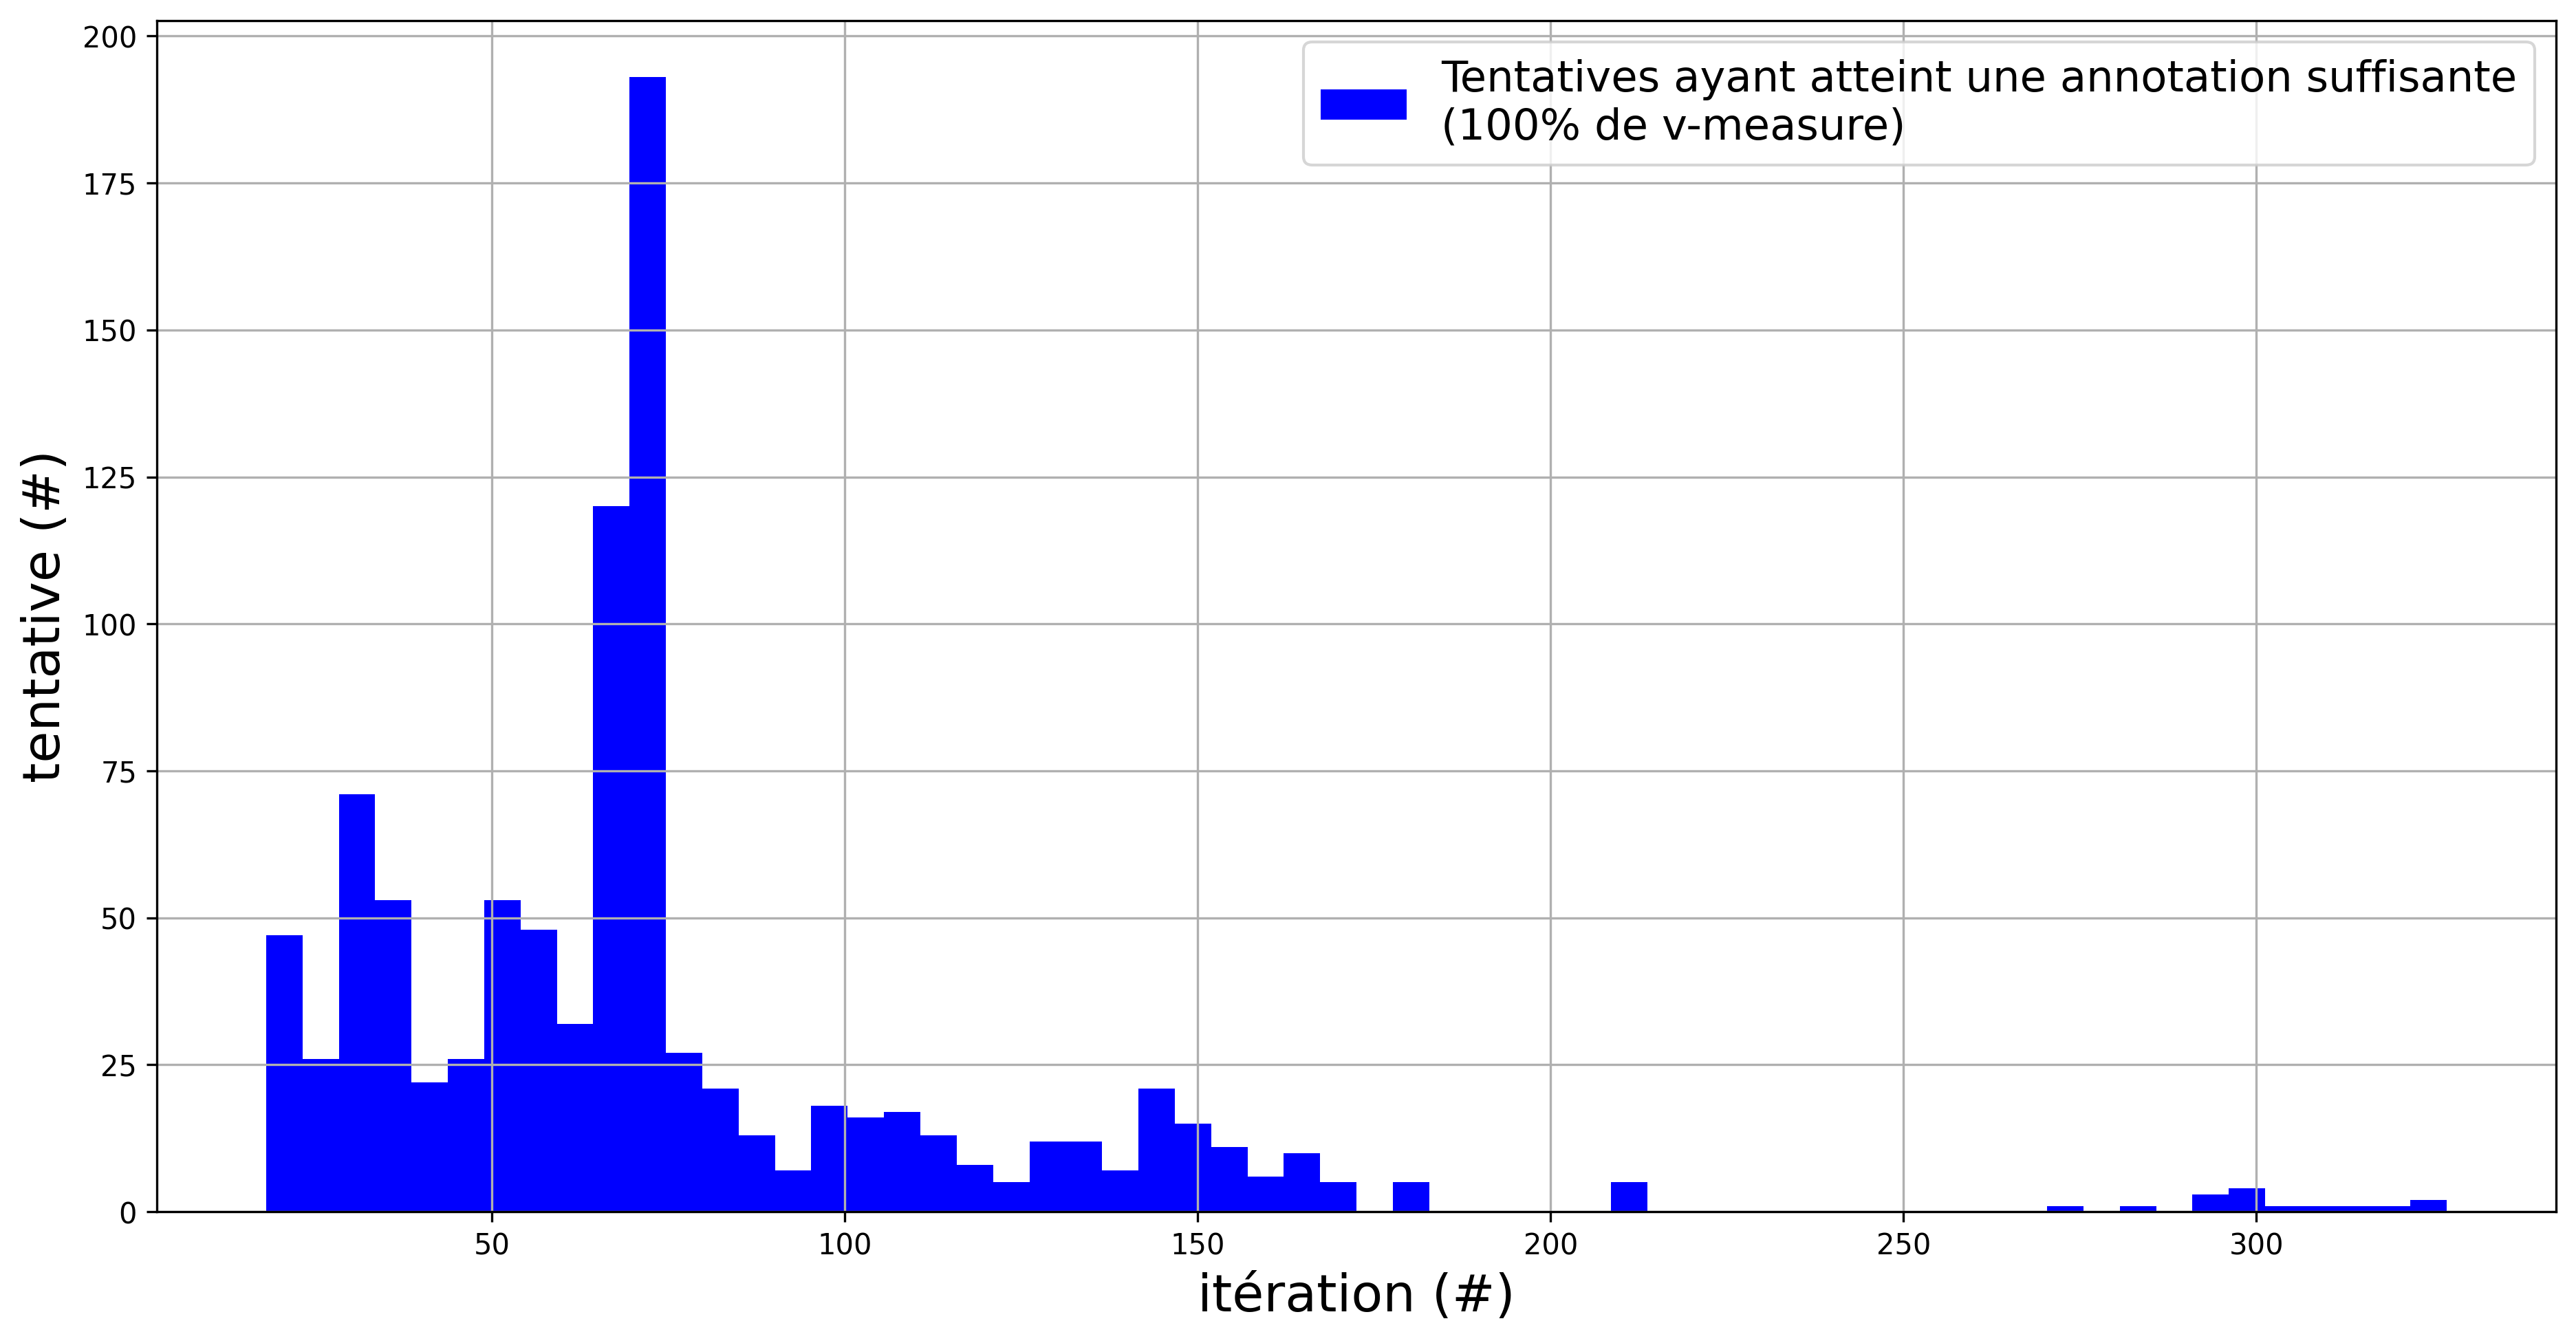

In [8]:
# Create a new figure.
fig_hist1: Figure = plt.figure(figsize=(15, 7.5), dpi=300)
axis_hist1 = fig_hist1.gca()

# Plot histogram of iteration for vmeausre 100%.
axis_hist1.hist(
    list_of_100vmeasure_iterations,
    bins=2*int(math.sqrt(len(list_of_100vmeasure_iterations))),  # int(len(LIST_OF_ITERATIONS)/2),
    label="Tentatives ayant atteint une annotation suffisante\n(100% de v-measure)",
    color="blue",
)
print("bins:", 2*int(math.sqrt(len(list_of_100vmeasure_iterations))))

# Plot histogram of iteration for convergence.
#axis_hist1.hist(
#    list_of_convergence_iterations,
#    bins=int(math.sqrt(len(list_of_convergence_iterations))),  # int(len(LIST_OF_ITERATIONS)/2),
#    label="Tentatives complétement annotées",
#    color="orange",
#)

# Set axis name.
axis_hist1.set_xlabel(
    "itération (#)",
    fontsize=18,
)
axis_hist1.set_ylabel(
    "tentative (#)",
    fontsize=18,
)

# Plot the legend.
axis_hist1.legend(
    # bbox_to_anchor=(0.50, -0.10),
    # title="Type of settings used for computations",
    # loc="upper center",
    # ncol=2,
    # title_fontsize=12,
    fontsize=15,
)

# Plot the grid.
axis_hist1.grid(True)

In [9]:
# Store the graph.
fig_hist1.savefig(
    "../results/etude-convergence-histogramme-annotation-suffisante.png",
    dpi=300,
    transparent=True,
    bbox_inches="tight",
)

bins: 60


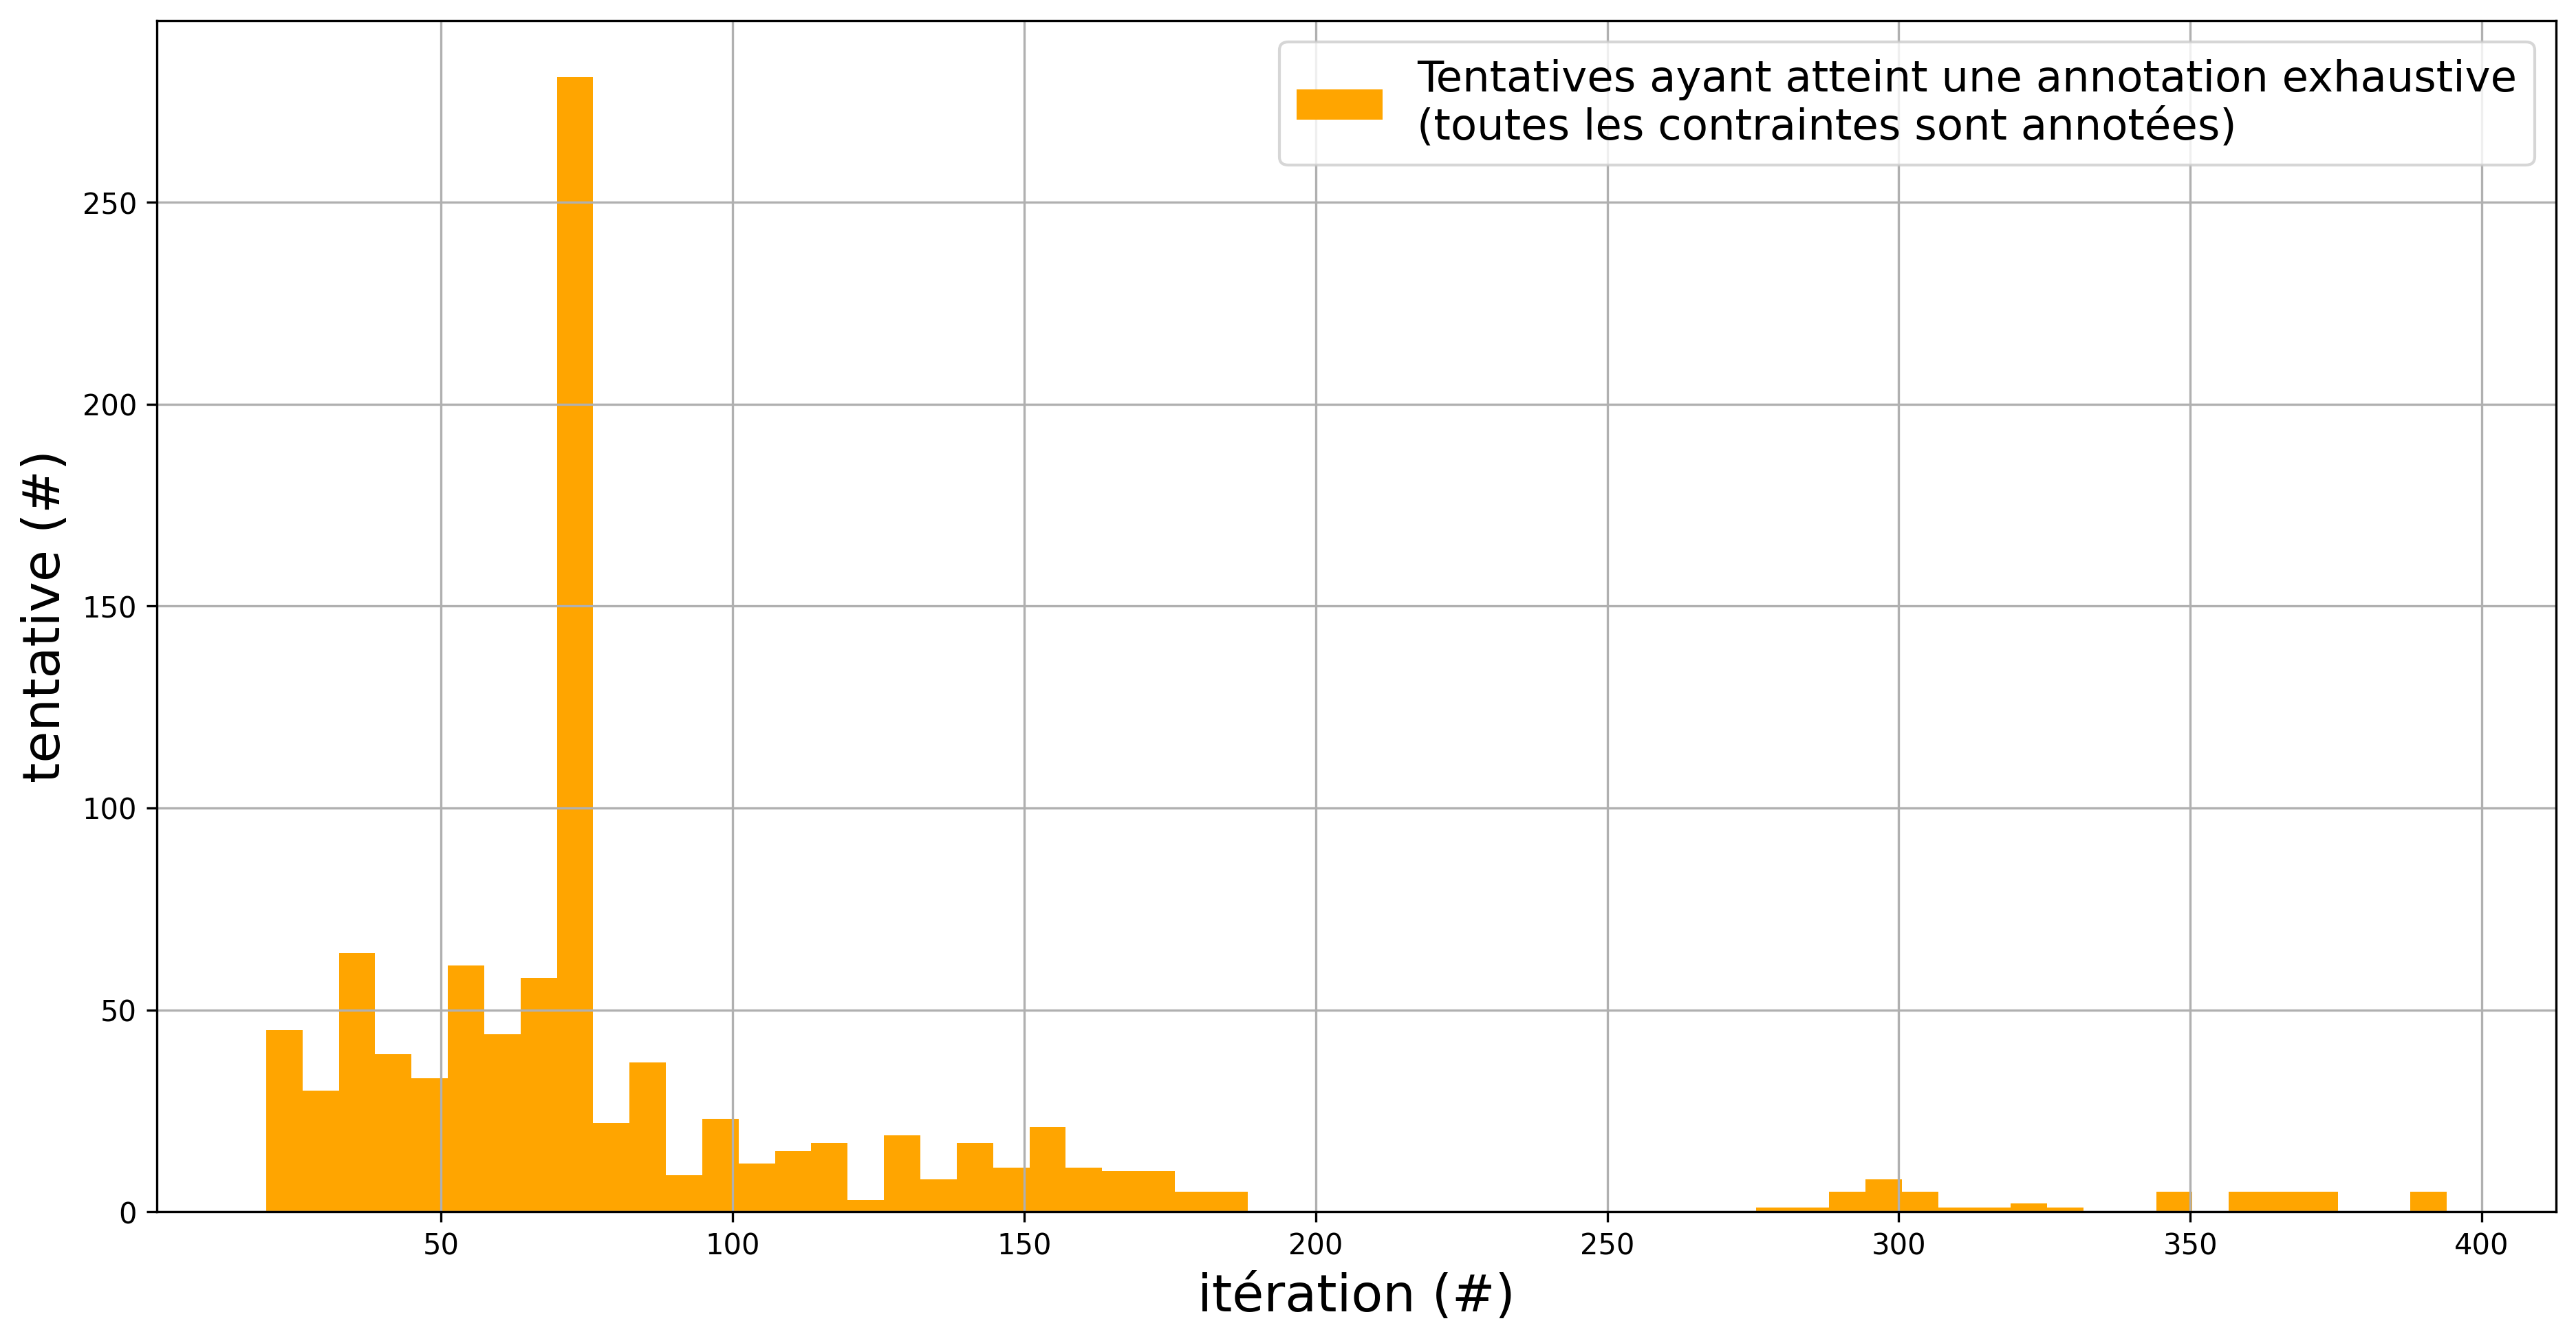

In [10]:
# Create a new figure.
fig_hist2: Figure = plt.figure(figsize=(15, 7.5), dpi=300)
axis_hist2 = fig_hist2.gca()

# Plot histogram of iteration for vmeausre 100%.
#axis_hist.hist(
#    list_of_100vmeasure_iterations,
#    bins=int(math.sqrt(len(list_of_100vmeasure_iterations))),  # int(len(LIST_OF_ITERATIONS)/2),
#    label="Tentatives atteingant une vmeasure de 100%",
#    color="blue",
#)

# Plot histogram of iteration for convergence.
axis_hist2.hist(
    list_of_convergence_iterations,
    bins=2*int(math.sqrt(len(list_of_convergence_iterations))),  # int(len(LIST_OF_ITERATIONS)/2),
    label="Tentatives ayant atteint une annotation exhaustive\n(toutes les contraintes sont annotées)",
    color="orange",
)
print("bins:", 2*int(math.sqrt(len(list_of_convergence_iterations))))

# Set axis name.
axis_hist2.set_xlabel(
    "itération (#)",
    fontsize=18,
)
axis_hist2.set_ylabel(
    "tentative (#)",
    fontsize=18,
)

# Plot the legend.
axis_hist2.legend(
    # bbox_to_anchor=(0.50, -0.10),
    # title="Type of settings used for computations",
    # loc="upper center",
    # ncol=2,
    # title_fontsize=12,
    fontsize=15,
)

# Plot the grid.
axis_hist2.grid(True)

In [11]:
# Store the graph.
fig_hist2.savefig(
    "../results/etude-convergence-histogramme-annotation-exhaustive.png",
    dpi=300,
    transparent=True,
    bbox_inches="tight",
)

Convergence of mean experiment.

In [12]:
def get_MEAN_SEM_of_convergence_evolution(
    local_LIST_OF_ITERATIONS,
    local_LIST_OF_EXPERIMENT_ENVIRONMENTS,
):


    # Initialize storage of experiment performances for all iterations.
    dict_of_global_performances_evolution: Dict[str, List[float]] = {
        iter_perf: [] for iter_perf in local_LIST_OF_ITERATIONS
    }
    # Initialize storage of performance mean for all iterations.
    dict_of_global_performances_evolution_MEAN: Dict[str, float] = {
        iter_mean: 0 for iter_mean in local_LIST_OF_ITERATIONS
    }
    # Initialize storage of performance standard error of the mean for all iterations.
    dict_of_global_performances_evolution_SEM: Dict[str, float] = {
        iter_pstdev: 0 for iter_pstdev in local_LIST_OF_ITERATIONS
    }

    # For each experiment...
    for env_a in local_LIST_OF_EXPERIMENT_ENVIRONMENTS:

        # Load clustering evaluations.
        with open(
            env_a + "dict_of_clustering_performances.json", "r"
        ) as evaluation_file:
            dict_of_clustering_performances: Dict[
                str, Dict[str, float]
            ] = json.load(evaluation_file)

        # For each requested iteration...
        for iter_a in local_LIST_OF_ITERATIONS:

            # Append the clustering performancre for the current experiment and for this iteration.
            if iter_a in dict_of_clustering_performances.keys():
                dict_of_global_performances_evolution[iter_a].append(
                    dict_of_clustering_performances[iter_a]["v_measure"]
                )
            # If iteration isn't reached by this experiment, duplicate the last known results.
            # Most of the time: the experiment has reached annotation completeness and there is no more iteration because clustering is "perfect" (v-measure==1.0).
            else:
                last_iter: str = max(dict_of_clustering_performances.keys())
                dict_of_global_performances_evolution[iter_a].append(
                    dict_of_clustering_performances[last_iter]["v_measure"]
                )

    # Compute mean and sem of performance for each iteration.
    for iter_b in local_LIST_OF_ITERATIONS:

        # Compute mean of performance for this iteration.
        dict_of_global_performances_evolution_MEAN[iter_b] = numpy.mean(
            dict_of_global_performances_evolution[iter_b]
        )

        # Compute sem of performance for this iteration.
        dict_of_global_performances_evolution_SEM[iter_b] = scipystats.sem(
            dict_of_global_performances_evolution[iter_b]
        )
        
    # Return
    return dict_of_global_performances_evolution_MEAN, dict_of_global_performances_evolution_SEM

In [13]:
MEAN_convergence_ALL, SEM_convergence_ALL = get_MEAN_SEM_of_convergence_evolution(
    local_LIST_OF_ITERATIONS=LIST_OF_ITERATIONS,
    local_LIST_OF_EXPERIMENT_ENVIRONMENTS=LIST_OF_EXPERIMENT_ENVIRONMENTS,
)

Convergence of fastest and lowest experiments.

In [16]:
# Load fastest (too reach vmeasure=100%) clustering evaluations.
env_fastest_100 = "../experiments/bank_cards_v1/simple_prep/tfidf/closest-50/hier_comp-10c/0001/"
with open(
    env_fastest_100 + "dict_of_clustering_performances.json", "r"
) as evaluation_file:
    dict_of_clustering_performances_for_fastest_100: Dict[
        str, Dict[str, float]
    ] = json.load(evaluation_file)

In [17]:
# Load slowest (too reach vmeasure=100%) clustering evaluations.
env_slowest_100 = "../experiments/bank_cards_v1/no_prep/tfidf/farthest-50/spectral_SPEC-10c/0001/"
with open(
    env_slowest_100 + "dict_of_clustering_performances.json", "r"
) as evaluation_file:
    dict_of_clustering_performances_for_slowest_100: Dict[
        str, Dict[str, float]
    ] = json.load(evaluation_file)

Create the figure of MEAN + FASTEST + LOWEST.

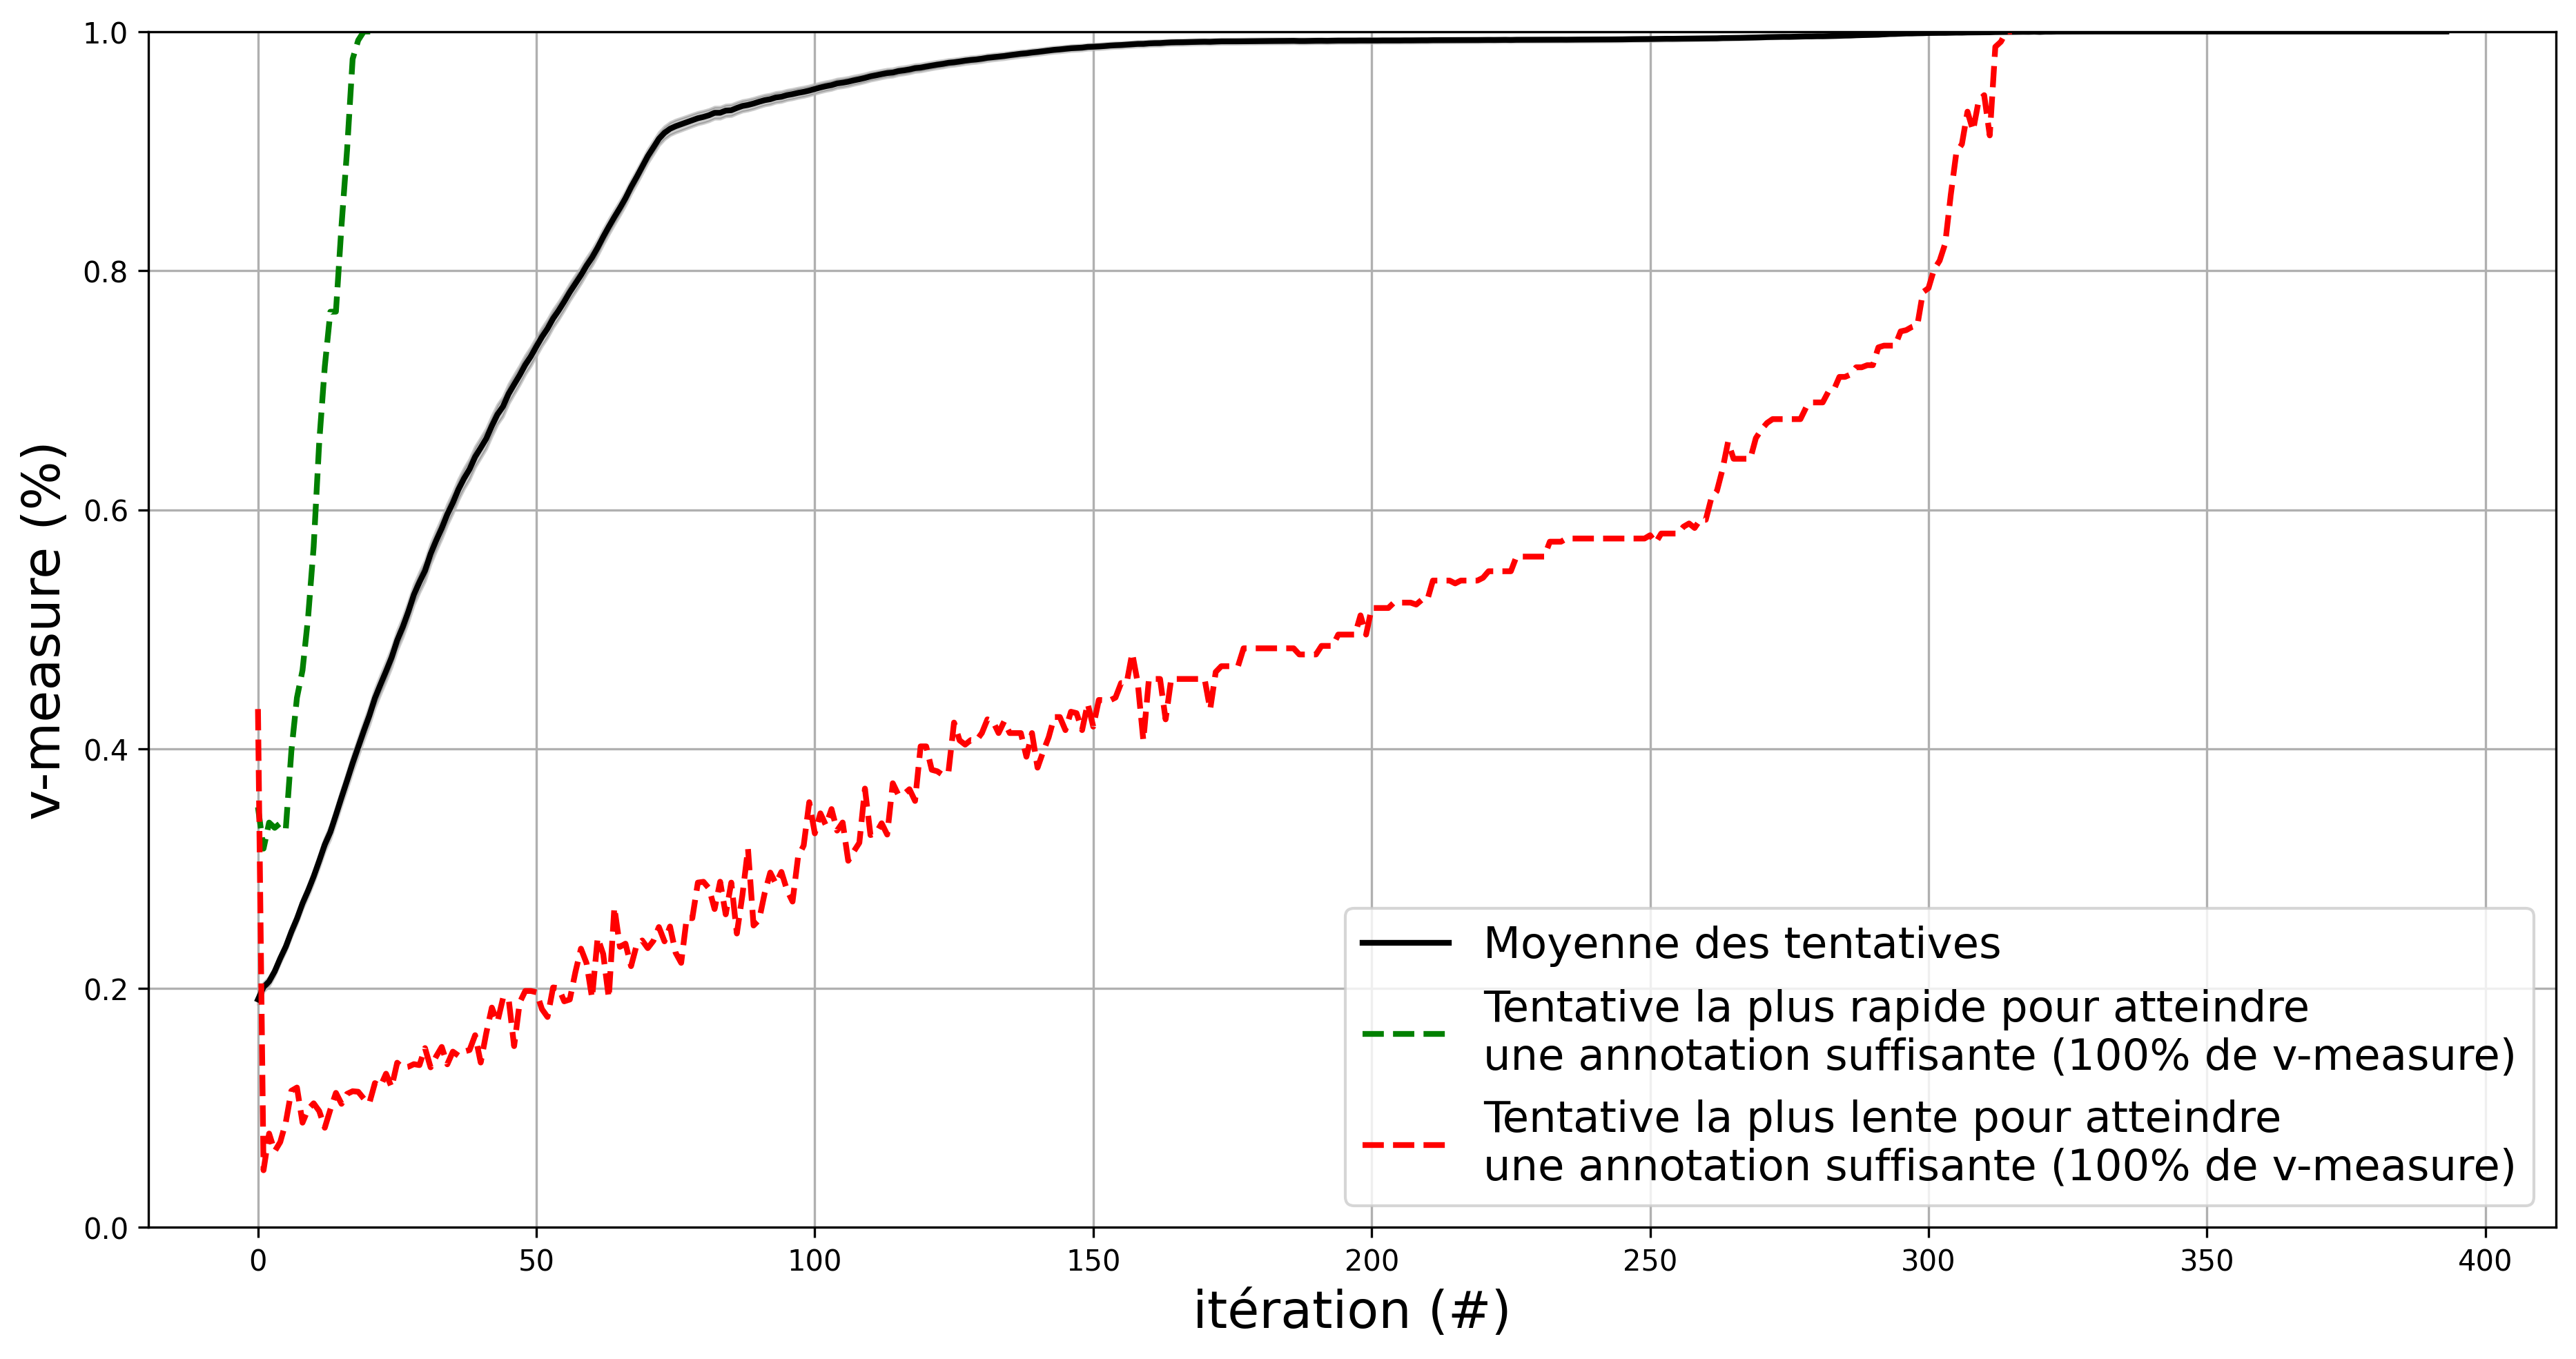

In [18]:
# Create a new figure.
fig_plot_average: Figure = plt.figure(figsize=(15, 7.5), dpi=300)
axis_plot_average = fig_plot_average.gca()

# Set range of axis.
axis_plot_average.set_ylim(ymin=0, ymax=1)

# Plot average clustering performance evolution.
axis_plot_average.plot(
    [int(iter_plot) for iter_plot in LIST_OF_ITERATIONS],  # x
    [MEAN_convergence_ALL[iter_mean_plot] for iter_mean_plot in LIST_OF_ITERATIONS],  # y
    label="Moyenne des tentatives",
    marker="",
    markerfacecolor="black",
    markersize=5,
    color="black",
    linewidth=2,
    linestyle="-",
)
axis_plot_average.fill_between(
    x=[int(iter_plot) for iter_plot in LIST_OF_ITERATIONS],  # x
    y1=[(MEAN_convergence_ALL[iter_errinf_plot] - SEM_convergence_ALL[iter_errinf_plot]) for iter_errinf_plot in LIST_OF_ITERATIONS],  # y1
    y2=[(MEAN_convergence_ALL[iter_errsup_plot] + SEM_convergence_ALL[iter_errsup_plot]) for iter_errsup_plot in LIST_OF_ITERATIONS],  # y2
    color="black",
    alpha=0.2,
)

# Plot fastest average clustering performance evolution.
axis_plot_average.plot(
    [
        int(iter_plot) for iter_plot in LIST_OF_ITERATIONS
        if str(iter_plot).zfill(4) in dict_of_clustering_performances_for_fastest_100.keys()
    ],  # x
    [
        dict_of_clustering_performances_for_fastest_100[iter_fast_plot]["v_measure"] for iter_fast_plot in LIST_OF_ITERATIONS
        if str(iter_fast_plot).zfill(4) in dict_of_clustering_performances_for_fastest_100.keys()
    ],  # y
    label="Tentative la plus rapide pour atteindre\nune annotation suffisante (100% de v-measure)",
    marker="",
    markerfacecolor="green",
    markersize=3,
    color="green",
    linewidth=2,
    linestyle="--",
)

# Plot lowest average clustering performance evolution.
axis_plot_average.plot(
    [
        int(iter_plot) for iter_plot in LIST_OF_ITERATIONS
        if str(iter_plot).zfill(4) in dict_of_clustering_performances_for_slowest_100.keys()
    ],  # x
    [
        dict_of_clustering_performances_for_slowest_100[iter_slow_plot]["v_measure"] for iter_slow_plot in LIST_OF_ITERATIONS
        if str(iter_slow_plot).zfill(4) in dict_of_clustering_performances_for_slowest_100.keys()
    ],  # y
    label="Tentative la plus lente pour atteindre\nune annotation suffisante (100% de v-measure)",
    marker="",
    markerfacecolor="red",
    markersize=3,
    color="red",
    linewidth=2,
    linestyle="--",
)

# Set axis name.
axis_plot_average.set_xlabel("itération (#)", fontsize=18,)
axis_plot_average.set_ylabel("v-measure (%)", fontsize=18,)

# Plot the legend.
axis_plot_average.legend(fontsize=15,)

# Plot the grid.
axis_plot_average.grid(True)

In [19]:
# Store the graph.
fig_plot_average.savefig(
    "../results/etude-convergence-evolution-moyenne-0par-iteration.png",
    dpi=300,
    transparent=True,
    bbox_inches="tight",
)

Create the figure of MEAN + PREPROCESSING.

In [20]:
MEAN_convergence_no_prep, SEM_convergence_no_prep = get_MEAN_SEM_of_convergence_evolution(
    local_LIST_OF_ITERATIONS=LIST_OF_ITERATIONS,
    local_LIST_OF_EXPERIMENT_ENVIRONMENTS=[
        env for env in LIST_OF_EXPERIMENT_ENVIRONMENTS
        if "no_prep" in env
    ],
)

In [21]:
MEAN_convergence_simple_prep, SEM_convergence_simple_prep = get_MEAN_SEM_of_convergence_evolution(
    local_LIST_OF_ITERATIONS=LIST_OF_ITERATIONS,
    local_LIST_OF_EXPERIMENT_ENVIRONMENTS=[
        env for env in LIST_OF_EXPERIMENT_ENVIRONMENTS
        if "simple_prep" in env
    ],
)

In [22]:
MEAN_convergence_lemma_prep, SEM_convergence_lemma_prep = get_MEAN_SEM_of_convergence_evolution(
    local_LIST_OF_ITERATIONS=LIST_OF_ITERATIONS,
    local_LIST_OF_EXPERIMENT_ENVIRONMENTS=[
        env for env in LIST_OF_EXPERIMENT_ENVIRONMENTS
        if "lemma_prep" in env
    ],
)

In [23]:
MEAN_convergence_filter_prep, SEM_convergence_filter_prep = get_MEAN_SEM_of_convergence_evolution(
    local_LIST_OF_ITERATIONS=LIST_OF_ITERATIONS,
    local_LIST_OF_EXPERIMENT_ENVIRONMENTS=[
        env for env in LIST_OF_EXPERIMENT_ENVIRONMENTS
        if "filter_prep" in env
    ],
)

In [24]:
with_error_bars = True

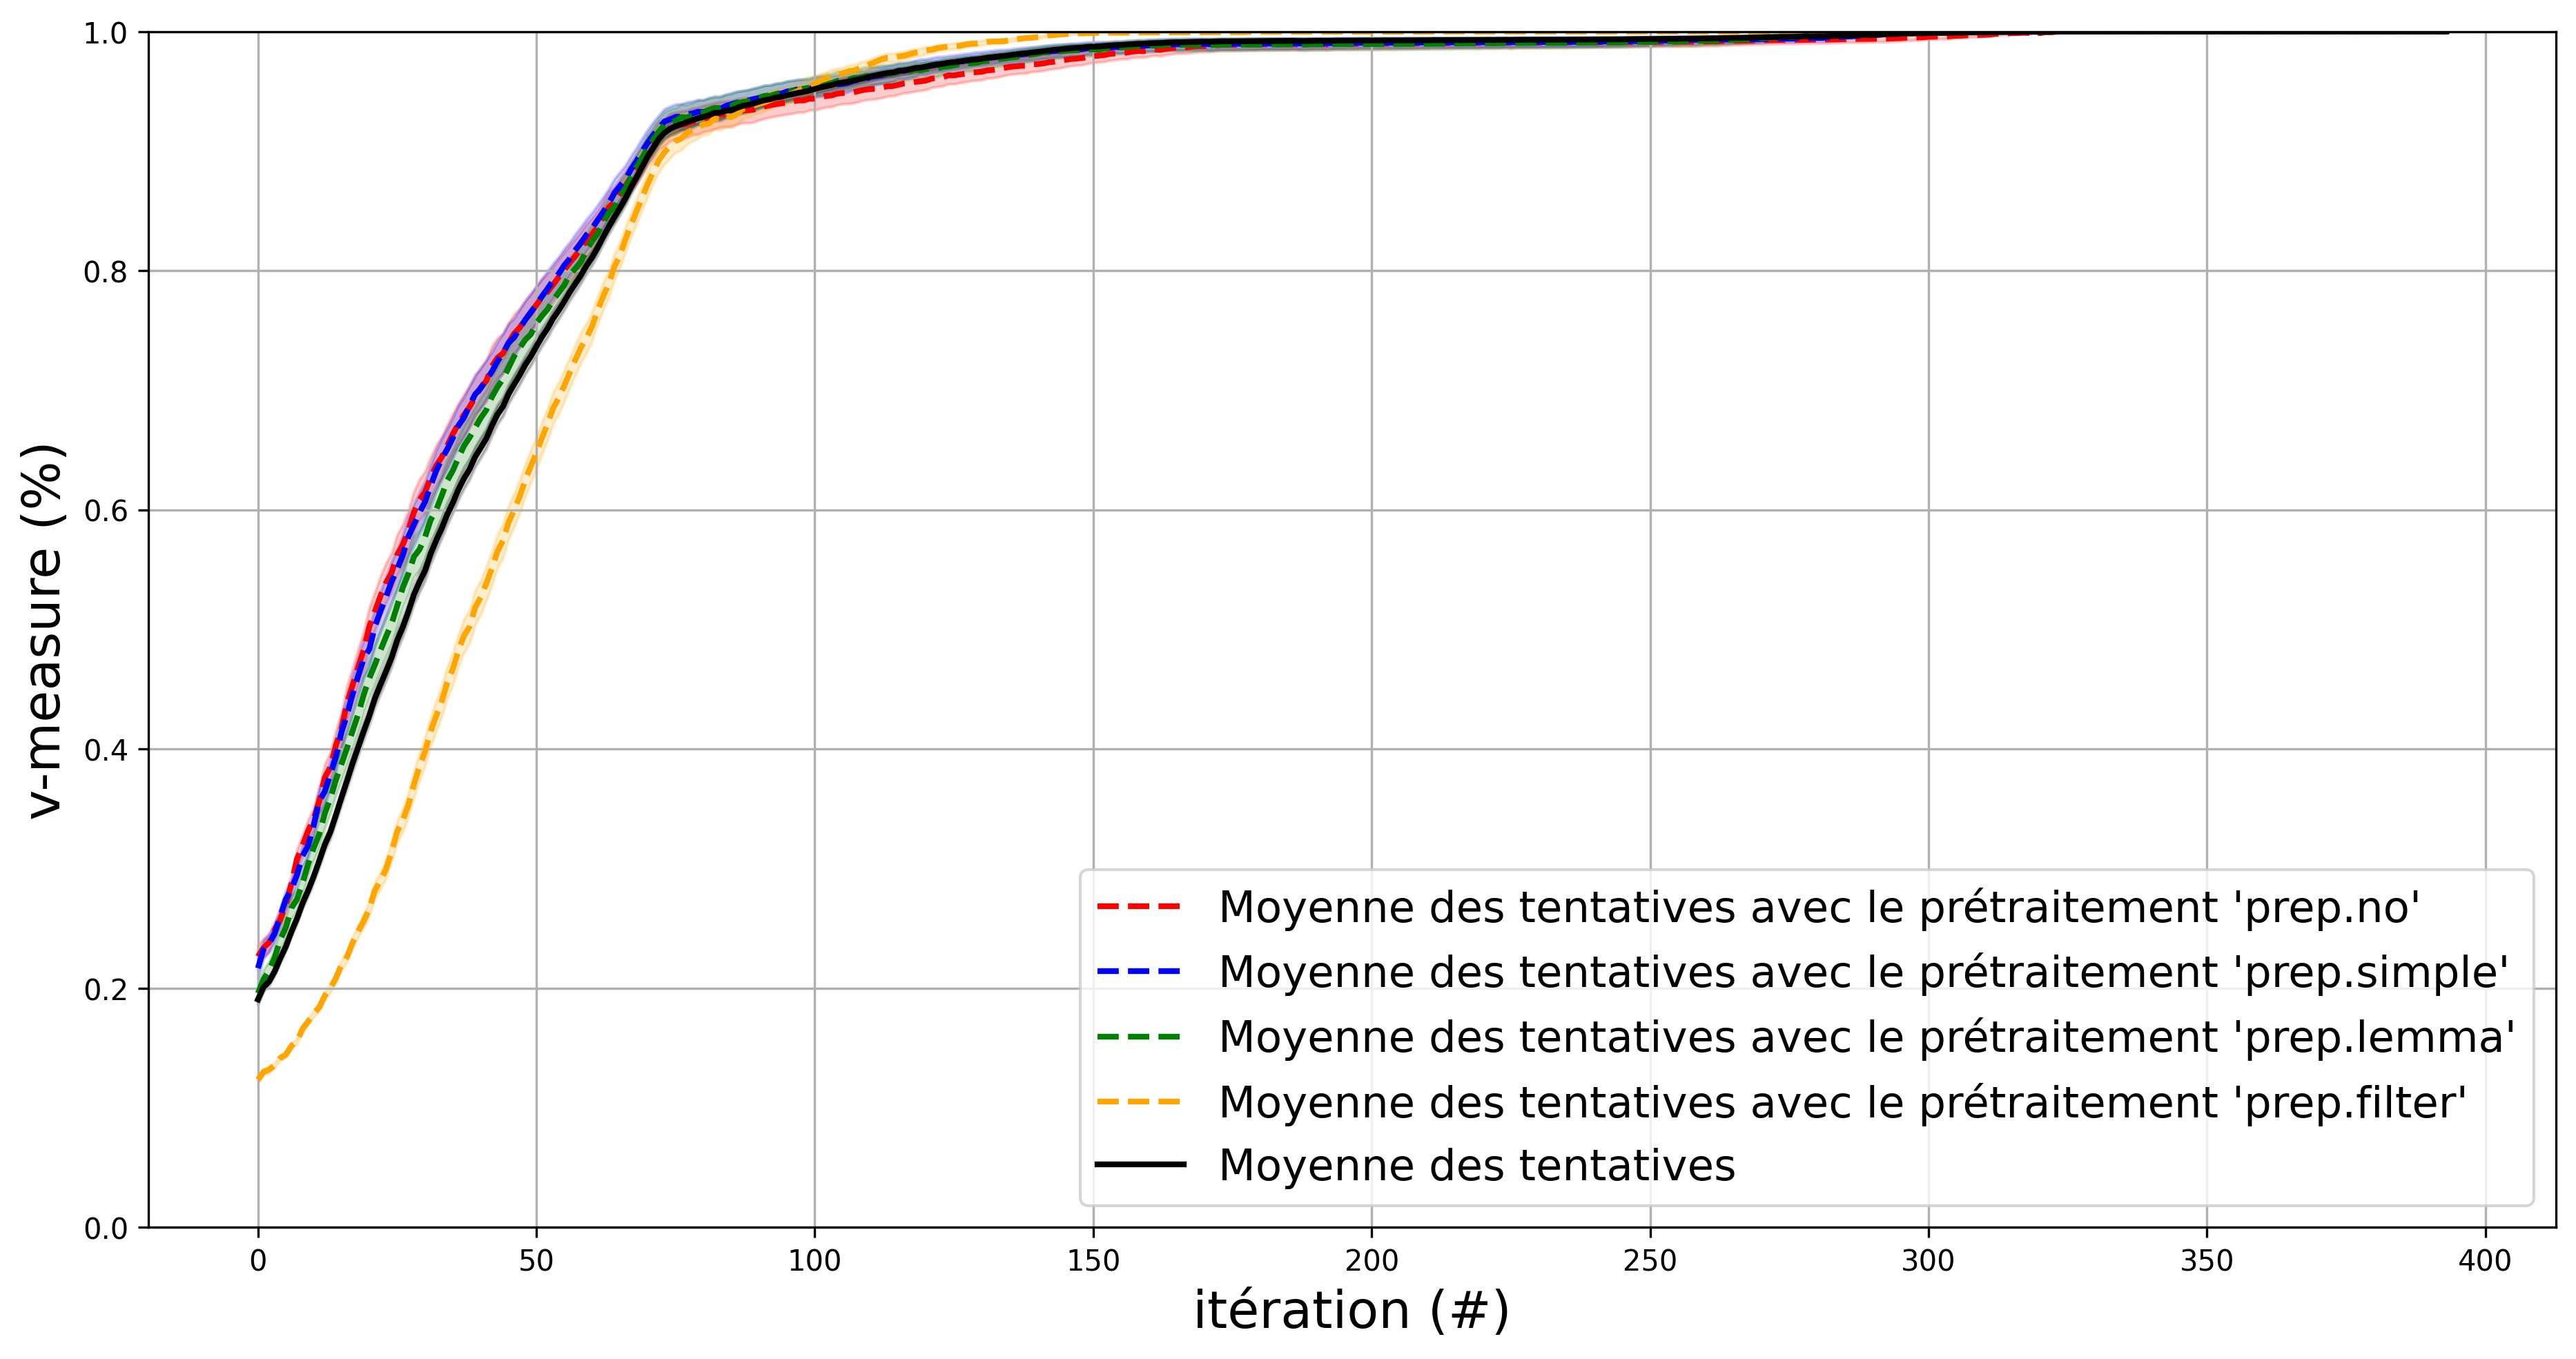

In [25]:
# Create a new figure.
fig_plot_prep: Figure = plt.figure(figsize=(15, 7.5), dpi=300)
axis_plot_prep = fig_plot_prep.gca()

# Set range of axis.
axis_plot_prep.set_ylim(ymin=0, ymax=1)

# Plot average clustering performance evolution for no-prep.
axis_plot_prep.plot(
    [int(iter_plot) for iter_plot in LIST_OF_ITERATIONS],  # x
    [MEAN_convergence_no_prep[iter_mean_plot] for iter_mean_plot in LIST_OF_ITERATIONS],  # y
    label="Moyenne des tentatives avec le prétraitement 'prep.no'",
    marker="",
    markerfacecolor="red",
    markersize=3,
    color="red",
    linewidth=2,
    linestyle="--",
)
if with_error_bars:
    axis_plot_prep.fill_between(
        x=[int(iter_plot) for iter_plot in LIST_OF_ITERATIONS],  # x
        y1=[(MEAN_convergence_no_prep[iter_errinf_plot] - SEM_convergence_no_prep[iter_errinf_plot]) for iter_errinf_plot in LIST_OF_ITERATIONS],  # y1
        y2=[(MEAN_convergence_no_prep[iter_errsup_plot] + SEM_convergence_no_prep[iter_errsup_plot]) for iter_errsup_plot in LIST_OF_ITERATIONS],  # y2
        color="red",
        alpha=0.2,
    )
# Plot average clustering performance evolution for simple-prep.
axis_plot_prep.plot(
    [int(iter_plot) for iter_plot in LIST_OF_ITERATIONS],  # x
    [MEAN_convergence_simple_prep[iter_mean_plot] for iter_mean_plot in LIST_OF_ITERATIONS],  # y
    label="Moyenne des tentatives avec le prétraitement 'prep.simple'",
    marker="",
    markerfacecolor="blue",
    markersize=3,
    color="blue",
    linewidth=2,
    linestyle="--",
)
if with_error_bars:
    axis_plot_prep.fill_between(
        x=[int(iter_plot) for iter_plot in LIST_OF_ITERATIONS],  # x
        y1=[(MEAN_convergence_simple_prep[iter_errinf_plot] - SEM_convergence_simple_prep[iter_errinf_plot]) for iter_errinf_plot in LIST_OF_ITERATIONS],  # y1
        y2=[(MEAN_convergence_simple_prep[iter_errsup_plot] + SEM_convergence_simple_prep[iter_errsup_plot]) for iter_errsup_plot in LIST_OF_ITERATIONS],  # y2
        color="blue",
        alpha=0.2,
    )
# Plot average clustering performance evolution for lemma-prep.
axis_plot_prep.plot(
    [int(iter_plot) for iter_plot in LIST_OF_ITERATIONS],  # x
    [MEAN_convergence_lemma_prep[iter_mean_plot] for iter_mean_plot in LIST_OF_ITERATIONS],  # y
    label="Moyenne des tentatives avec le prétraitement 'prep.lemma'",
    marker="",
    markerfacecolor="green",
    markersize=3,
    color="green",
    linewidth=2,
    linestyle="--",
)
if with_error_bars:
    axis_plot_prep.fill_between(
        x=[int(iter_plot) for iter_plot in LIST_OF_ITERATIONS],  # x
        y1=[(MEAN_convergence_lemma_prep[iter_errinf_plot] - SEM_convergence_lemma_prep[iter_errinf_plot]) for iter_errinf_plot in LIST_OF_ITERATIONS],  # y1
        y2=[(MEAN_convergence_lemma_prep[iter_errsup_plot] + SEM_convergence_lemma_prep[iter_errsup_plot]) for iter_errsup_plot in LIST_OF_ITERATIONS],  # y2
        color="green",
        alpha=0.2,
    )
# Plot average clustering performance evolution for filter-prep.
axis_plot_prep.plot(
    [int(iter_plot) for iter_plot in LIST_OF_ITERATIONS],  # x
    [MEAN_convergence_filter_prep[iter_mean_plot] for iter_mean_plot in LIST_OF_ITERATIONS],  # y
    label="Moyenne des tentatives avec le prétraitement 'prep.filter'",
    marker="",
    markerfacecolor="orange",
    markersize=3,
    color="orange",
    linewidth=2,
    linestyle="--",
)
if with_error_bars:
    axis_plot_prep.fill_between(
        x=[int(iter_plot) for iter_plot in LIST_OF_ITERATIONS],  # x
        y1=[(MEAN_convergence_filter_prep[iter_errinf_plot] - SEM_convergence_filter_prep[iter_errinf_plot]) for iter_errinf_plot in LIST_OF_ITERATIONS],  # y1
        y2=[(MEAN_convergence_filter_prep[iter_errsup_plot] + SEM_convergence_filter_prep[iter_errsup_plot]) for iter_errsup_plot in LIST_OF_ITERATIONS],  # y2
        color="orange",
        alpha=0.2,
    )

# Plot average clustering performance evolution.
axis_plot_prep.plot(
    [int(iter_plot) for iter_plot in LIST_OF_ITERATIONS],  # x
    [MEAN_convergence_ALL[iter_mean_plot] for iter_mean_plot in LIST_OF_ITERATIONS],  # y
    label="Moyenne des tentatives",
    marker="",
    markerfacecolor="black",
    markersize=5,
    color="black",
    linewidth=2,
    linestyle="-",
)
axis_plot_prep.fill_between(
    x=[int(iter_plot) for iter_plot in LIST_OF_ITERATIONS],  # x
    y1=[(MEAN_convergence_ALL[iter_errinf_plot] - SEM_convergence_ALL[iter_errinf_plot]) for iter_errinf_plot in LIST_OF_ITERATIONS],  # y1
    y2=[(MEAN_convergence_ALL[iter_errsup_plot] + SEM_convergence_ALL[iter_errsup_plot]) for iter_errsup_plot in LIST_OF_ITERATIONS],  # y2
    color="black",
    alpha=0.2,
)

# Set axis name.
axis_plot_prep.set_xlabel("itération (#)", fontsize=18,)
axis_plot_prep.set_ylabel("v-measure (%)", fontsize=18,)

# Plot the legend.
axis_plot_prep.legend(fontsize=15,)

# Plot the grid.
axis_plot_prep.grid(True)

In [26]:
# Store the graph.
fig_plot_prep.savefig(
    "../results/etude-convergence-evolution-moyenne-1preprocessing-par-iteration.png",
    dpi=300,
    transparent=True,
    bbox_inches="tight",
)

Create the figure of MEAN + VECTORIZATION.

In [27]:
MEAN_convergence_tfidf, SEM_convergence_tfidf = get_MEAN_SEM_of_convergence_evolution(
    local_LIST_OF_ITERATIONS=LIST_OF_ITERATIONS,
    local_LIST_OF_EXPERIMENT_ENVIRONMENTS=[
        env for env in LIST_OF_EXPERIMENT_ENVIRONMENTS
        if "tfidf" in env
    ],
)

In [28]:
MEAN_convergence_fr_core_news_md, SEM_convergence_fr_core_news_md = get_MEAN_SEM_of_convergence_evolution(
    local_LIST_OF_ITERATIONS=LIST_OF_ITERATIONS,
    local_LIST_OF_EXPERIMENT_ENVIRONMENTS=[
        env for env in LIST_OF_EXPERIMENT_ENVIRONMENTS
        if "fr_core_news_md" in env
    ],
)

In [29]:
with_error_bars = True

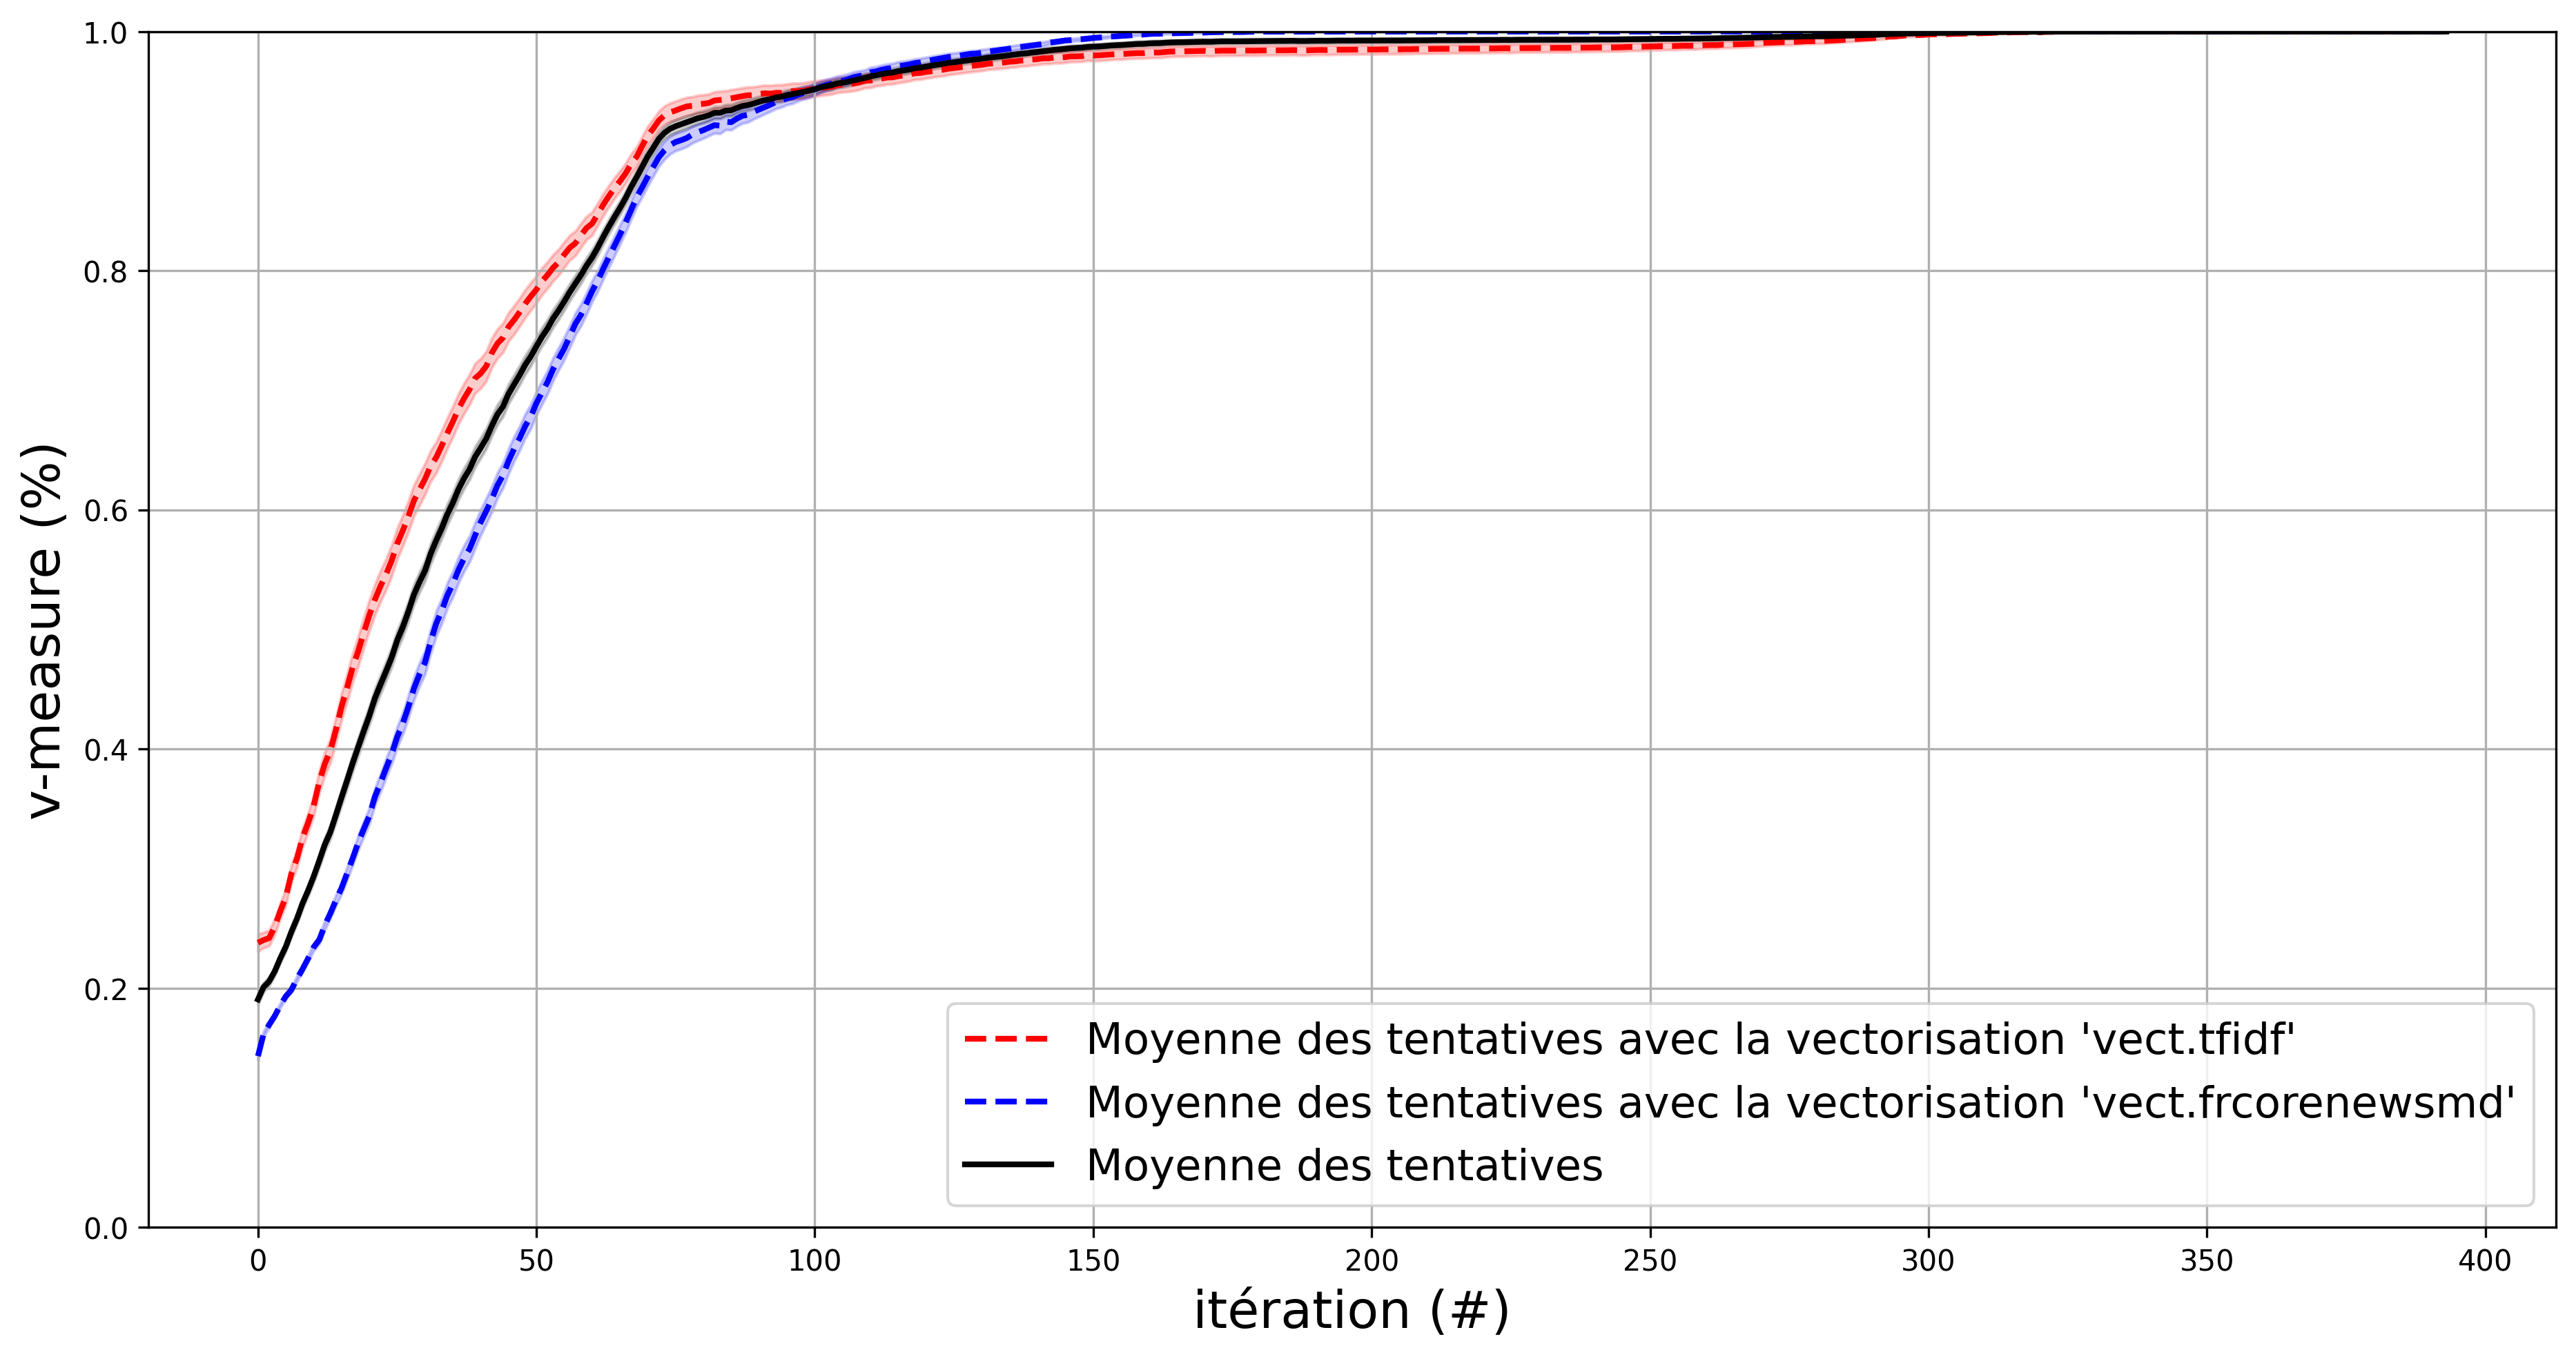

In [30]:
# Create a new figure.
fig_plot_vect: Figure = plt.figure(figsize=(15, 7.5), dpi=300)
axis_plot_vect = fig_plot_vect.gca()

# Set range of axis.
axis_plot_vect.set_ylim(ymin=0, ymax=1)

# Plot average clustering performance evolution for tfidf.
axis_plot_vect.plot(
    [int(iter_plot) for iter_plot in LIST_OF_ITERATIONS],  # x
    [MEAN_convergence_tfidf[iter_mean_plot] for iter_mean_plot in LIST_OF_ITERATIONS],  # y
    label="Moyenne des tentatives avec la vectorisation 'vect.tfidf'",
    marker="",
    markerfacecolor="red",
    markersize=3,
    color="red",
    linewidth=2,
    linestyle="--",
)
if with_error_bars:
    axis_plot_vect.fill_between(
        x=[int(iter_plot) for iter_plot in LIST_OF_ITERATIONS],  # x
        y1=[(MEAN_convergence_tfidf[iter_errinf_plot] - SEM_convergence_tfidf[iter_errinf_plot]) for iter_errinf_plot in LIST_OF_ITERATIONS],  # y1
        y2=[(MEAN_convergence_tfidf[iter_errsup_plot] + SEM_convergence_tfidf[iter_errsup_plot]) for iter_errsup_plot in LIST_OF_ITERATIONS],  # y2
        color="red",
        alpha=0.2,
    )
# Plot average clustering performance evolution for fr-core-news-md.
axis_plot_vect.plot(
    [int(iter_plot) for iter_plot in LIST_OF_ITERATIONS],  # x
    [MEAN_convergence_fr_core_news_md[iter_mean_plot] for iter_mean_plot in LIST_OF_ITERATIONS],  # y
    label="Moyenne des tentatives avec la vectorisation 'vect.frcorenewsmd'",
    marker="",
    markerfacecolor="blue",
    markersize=3,
    color="blue",
    linewidth=2,
    linestyle="--",
)
if with_error_bars:
    axis_plot_vect.fill_between(
        x=[int(iter_plot) for iter_plot in LIST_OF_ITERATIONS],  # x
        y1=[(MEAN_convergence_fr_core_news_md[iter_errinf_plot] - SEM_convergence_fr_core_news_md[iter_errinf_plot]) for iter_errinf_plot in LIST_OF_ITERATIONS],  # y1
        y2=[(MEAN_convergence_fr_core_news_md[iter_errsup_plot] + SEM_convergence_fr_core_news_md[iter_errsup_plot]) for iter_errsup_plot in LIST_OF_ITERATIONS],  # y2
        color="blue",
        alpha=0.2,
    )

# Plot average clustering performance evolution.
axis_plot_vect.plot(
    [int(iter_plot) for iter_plot in LIST_OF_ITERATIONS],  # x
    [MEAN_convergence_ALL[iter_mean_plot] for iter_mean_plot in LIST_OF_ITERATIONS],  # y
    label="Moyenne des tentatives",
    marker="",
    markerfacecolor="black",
    markersize=5,
    color="black",
    linewidth=2,
    linestyle="-",
)
axis_plot_vect.fill_between(
    x=[int(iter_plot) for iter_plot in LIST_OF_ITERATIONS],  # x
    y1=[(MEAN_convergence_ALL[iter_errinf_plot] - SEM_convergence_ALL[iter_errinf_plot]) for iter_errinf_plot in LIST_OF_ITERATIONS],  # y1
    y2=[(MEAN_convergence_ALL[iter_errsup_plot] + SEM_convergence_ALL[iter_errsup_plot]) for iter_errsup_plot in LIST_OF_ITERATIONS],  # y2
    color="black",
    alpha=0.2,
)

# Set axis name.
axis_plot_vect.set_xlabel("itération (#)", fontsize=18,)
axis_plot_vect.set_ylabel("v-measure (%)", fontsize=18,)

# Plot the legend.
axis_plot_vect.legend(fontsize=15,)

# Plot the grid.
axis_plot_vect.grid(True)

In [31]:
# Store the graph.
fig_plot_vect.savefig(
    "../results/etude-convergence-evolution-moyenne-2vectorization-par-iteration.png",
    dpi=300,
    transparent=True,
    bbox_inches="tight",
)

Create the figure of MEAN + CLUSTERING.

In [32]:
MEAN_convergence_kmeans_COP, SEM_convergence_kmeans_COP = get_MEAN_SEM_of_convergence_evolution(
    local_LIST_OF_ITERATIONS=LIST_OF_ITERATIONS,
    local_LIST_OF_EXPERIMENT_ENVIRONMENTS=[
        env for env in LIST_OF_EXPERIMENT_ENVIRONMENTS
        if "kmeans_COP" in env
    ],
)

In [33]:
MEAN_convergence_hier_sing, SEM_convergence_hier_sing = get_MEAN_SEM_of_convergence_evolution(
    local_LIST_OF_ITERATIONS=LIST_OF_ITERATIONS,
    local_LIST_OF_EXPERIMENT_ENVIRONMENTS=[
        env for env in LIST_OF_EXPERIMENT_ENVIRONMENTS
        if "hier_sing" in env
    ],
)

In [34]:
MEAN_convergence_hier_comp, SEM_convergence_hier_comp = get_MEAN_SEM_of_convergence_evolution(
    local_LIST_OF_ITERATIONS=LIST_OF_ITERATIONS,
    local_LIST_OF_EXPERIMENT_ENVIRONMENTS=[
        env for env in LIST_OF_EXPERIMENT_ENVIRONMENTS
        if "hier_comp" in env
    ],
)

In [35]:
MEAN_convergence_hier_avg, SEM_convergence_hier_avg = get_MEAN_SEM_of_convergence_evolution(
    local_LIST_OF_ITERATIONS=LIST_OF_ITERATIONS,
    local_LIST_OF_EXPERIMENT_ENVIRONMENTS=[
        env for env in LIST_OF_EXPERIMENT_ENVIRONMENTS
        if "hier_avg" in env
    ],
)

In [36]:
MEAN_convergence_hier_ward, SEM_convergence_hier_ward = get_MEAN_SEM_of_convergence_evolution(
    local_LIST_OF_ITERATIONS=LIST_OF_ITERATIONS,
    local_LIST_OF_EXPERIMENT_ENVIRONMENTS=[
        env for env in LIST_OF_EXPERIMENT_ENVIRONMENTS
        if "hier_ward" in env
    ],
)

In [37]:
MEAN_convergence_spectral_SPEC, SEM_convergence_spectral_SPEC = get_MEAN_SEM_of_convergence_evolution(
    local_LIST_OF_ITERATIONS=LIST_OF_ITERATIONS,
    local_LIST_OF_EXPERIMENT_ENVIRONMENTS=[
        env for env in LIST_OF_EXPERIMENT_ENVIRONMENTS
        if "spectral_SPEC" in env
    ],
)

In [38]:
with_error_bars = True

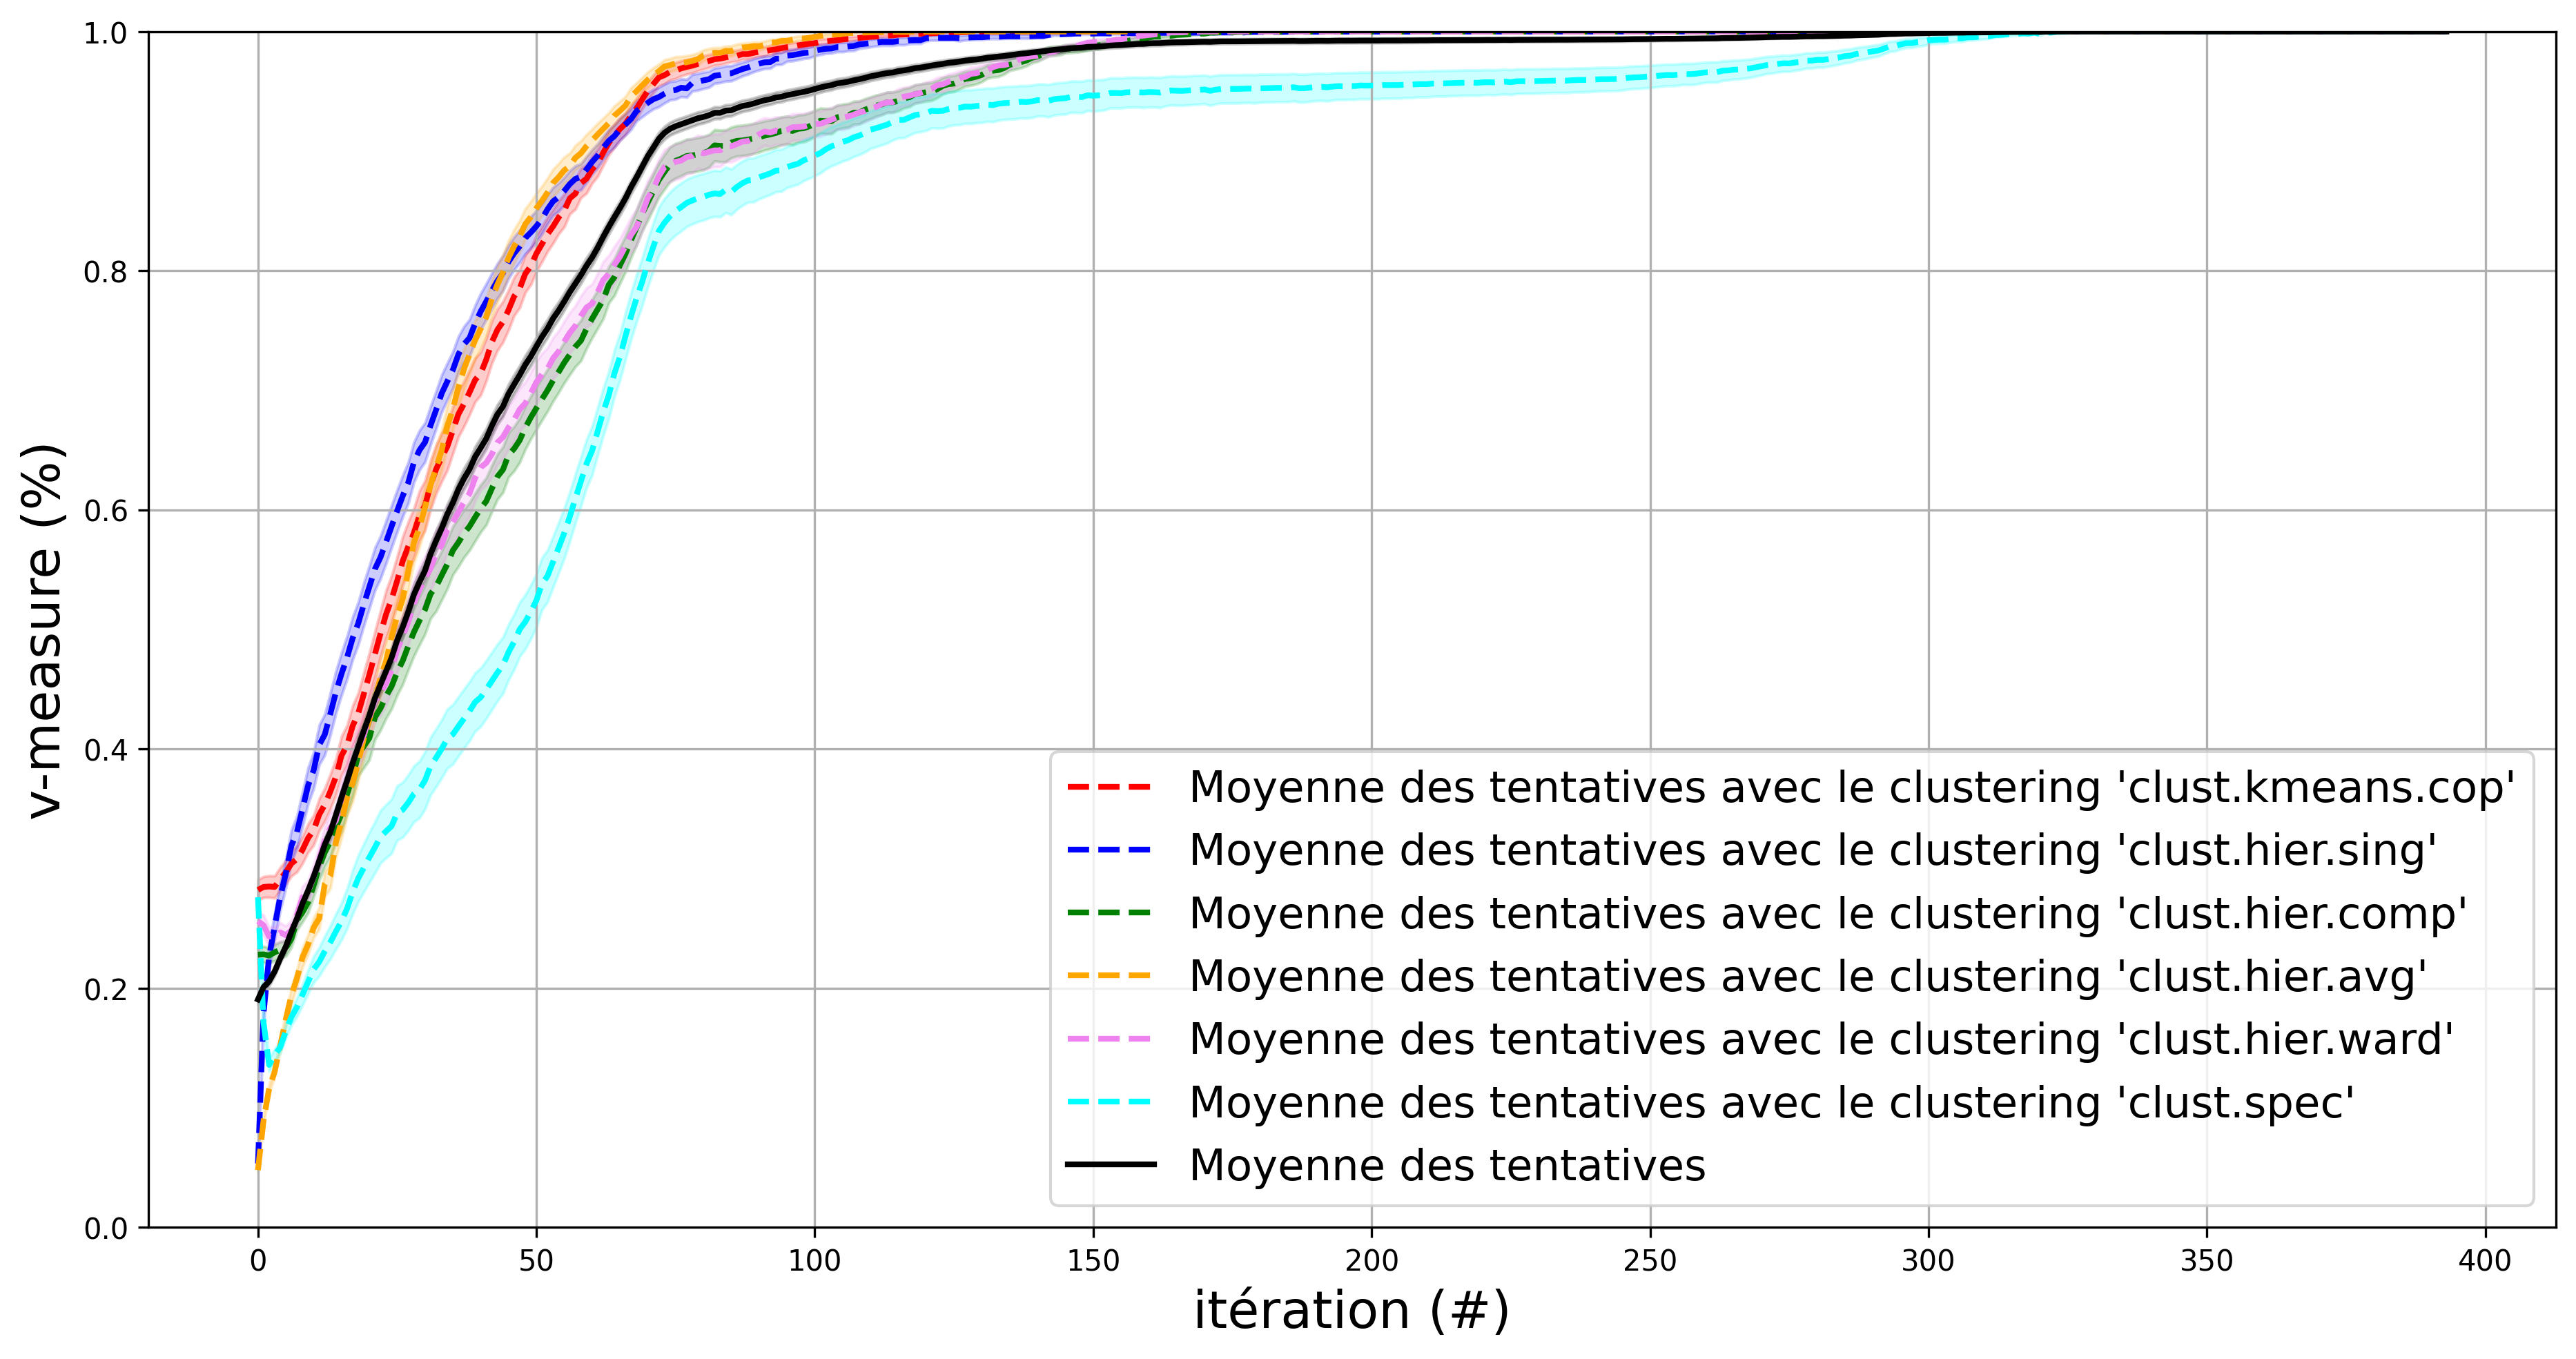

In [39]:
# Create a new figure.
fig_plot_clust: Figure = plt.figure(figsize=(15, 7.5), dpi=300)
axis_plot_clust = fig_plot_clust.gca()

# Set range of axis.
axis_plot_clust.set_ylim(ymin=0, ymax=1)

# Plot average clustering performance evolution for kmeans_COP.
axis_plot_clust.plot(
    [int(iter_plot) for iter_plot in LIST_OF_ITERATIONS],  # x
    [MEAN_convergence_kmeans_COP[iter_mean_plot] for iter_mean_plot in LIST_OF_ITERATIONS],  # y
    label="Moyenne des tentatives avec le clustering 'clust.kmeans.cop'",
    marker="",
    markerfacecolor="red",
    markersize=3,
    color="red",
    linewidth=2,
    linestyle="--",
)
if with_error_bars:
    axis_plot_clust.fill_between(
        x=[int(iter_plot) for iter_plot in LIST_OF_ITERATIONS],  # x
        y1=[(MEAN_convergence_kmeans_COP[iter_errinf_plot] - SEM_convergence_kmeans_COP[iter_errinf_plot]) for iter_errinf_plot in LIST_OF_ITERATIONS],  # y1
        y2=[(MEAN_convergence_kmeans_COP[iter_errsup_plot] + SEM_convergence_kmeans_COP[iter_errsup_plot]) for iter_errsup_plot in LIST_OF_ITERATIONS],  # y2
        color="red",
        alpha=0.2,
    )
# Plot average clustering performance evolution for hier_sing.
axis_plot_clust.plot(
    [int(iter_plot) for iter_plot in LIST_OF_ITERATIONS],  # x
    [MEAN_convergence_hier_sing[iter_mean_plot] for iter_mean_plot in LIST_OF_ITERATIONS],  # y
    label="Moyenne des tentatives avec le clustering 'clust.hier.sing'",
    marker="",
    markerfacecolor="blue",
    markersize=3,
    color="blue",
    linewidth=2,
    linestyle="--",
)
if with_error_bars:
    axis_plot_clust.fill_between(
        x=[int(iter_plot) for iter_plot in LIST_OF_ITERATIONS],  # x
        y1=[(MEAN_convergence_hier_sing[iter_errinf_plot] - SEM_convergence_hier_sing[iter_errinf_plot]) for iter_errinf_plot in LIST_OF_ITERATIONS],  # y1
        y2=[(MEAN_convergence_hier_sing[iter_errsup_plot] + SEM_convergence_hier_sing[iter_errsup_plot]) for iter_errsup_plot in LIST_OF_ITERATIONS],  # y2
        color="blue",
        alpha=0.2,
    )
# Plot average clustering performance evolution for hier_comp.
axis_plot_clust.plot(
    [int(iter_plot) for iter_plot in LIST_OF_ITERATIONS],  # x
    [MEAN_convergence_hier_comp[iter_mean_plot] for iter_mean_plot in LIST_OF_ITERATIONS],  # y
    label="Moyenne des tentatives avec le clustering 'clust.hier.comp'",
    marker="",
    markerfacecolor="green",
    markersize=3,
    color="green",
    linewidth=2,
    linestyle="--",
)
if with_error_bars:
    axis_plot_clust.fill_between(
        x=[int(iter_plot) for iter_plot in LIST_OF_ITERATIONS],  # x
        y1=[(MEAN_convergence_hier_comp[iter_errinf_plot] - SEM_convergence_hier_comp[iter_errinf_plot]) for iter_errinf_plot in LIST_OF_ITERATIONS],  # y1
        y2=[(MEAN_convergence_hier_comp[iter_errsup_plot] + SEM_convergence_hier_comp[iter_errsup_plot]) for iter_errsup_plot in LIST_OF_ITERATIONS],  # y2
        color="green",
        alpha=0.2,
    )
# Plot average clustering performance evolution for hier_avg.
axis_plot_clust.plot(
    [int(iter_plot) for iter_plot in LIST_OF_ITERATIONS],  # x
    [MEAN_convergence_hier_avg[iter_mean_plot] for iter_mean_plot in LIST_OF_ITERATIONS],  # y
    label="Moyenne des tentatives avec le clustering 'clust.hier.avg'",
    marker="",
    markerfacecolor="orange",
    markersize=3,
    color="orange",
    linewidth=2,
    linestyle="--",
)
if with_error_bars:
    axis_plot_clust.fill_between(
        x=[int(iter_plot) for iter_plot in LIST_OF_ITERATIONS],  # x
        y1=[(MEAN_convergence_hier_avg[iter_errinf_plot] - SEM_convergence_hier_avg[iter_errinf_plot]) for iter_errinf_plot in LIST_OF_ITERATIONS],  # y1
        y2=[(MEAN_convergence_hier_avg[iter_errsup_plot] + SEM_convergence_hier_avg[iter_errsup_plot]) for iter_errsup_plot in LIST_OF_ITERATIONS],  # y2
        color="orange",
        alpha=0.2,
    )
# Plot average clustering performance evolution for hier_ward.
axis_plot_clust.plot(
    [int(iter_plot) for iter_plot in LIST_OF_ITERATIONS],  # x
    [MEAN_convergence_hier_ward[iter_mean_plot] for iter_mean_plot in LIST_OF_ITERATIONS],  # y
    label="Moyenne des tentatives avec le clustering 'clust.hier.ward'",
    marker="",
    markerfacecolor="violet",
    markersize=3,
    color="violet",
    linewidth=2,
    linestyle="--",
)
if with_error_bars:
    axis_plot_clust.fill_between(
        x=[int(iter_plot) for iter_plot in LIST_OF_ITERATIONS],  # x
        y1=[(MEAN_convergence_hier_ward[iter_errinf_plot] - SEM_convergence_hier_ward[iter_errinf_plot]) for iter_errinf_plot in LIST_OF_ITERATIONS],  # y1
        y2=[(MEAN_convergence_hier_ward[iter_errsup_plot] + SEM_convergence_hier_ward[iter_errsup_plot]) for iter_errsup_plot in LIST_OF_ITERATIONS],  # y2
        color="violet",
        alpha=0.2,
    )
# Plot average clustering performance evolution for spectral_SPEC.
axis_plot_clust.plot(
    [int(iter_plot) for iter_plot in LIST_OF_ITERATIONS],  # x
    [MEAN_convergence_spectral_SPEC[iter_mean_plot] for iter_mean_plot in LIST_OF_ITERATIONS],  # y
    label="Moyenne des tentatives avec le clustering 'clust.spec'",
    marker="",
    markerfacecolor="cyan",
    markersize=3,
    color="cyan",
    linewidth=2,
    linestyle="--",
)
if with_error_bars:
    axis_plot_clust.fill_between(
        x=[int(iter_plot) for iter_plot in LIST_OF_ITERATIONS],  # x
        y1=[(MEAN_convergence_spectral_SPEC[iter_errinf_plot] - SEM_convergence_spectral_SPEC[iter_errinf_plot]) for iter_errinf_plot in LIST_OF_ITERATIONS],  # y1
        y2=[(MEAN_convergence_spectral_SPEC[iter_errsup_plot] + SEM_convergence_spectral_SPEC[iter_errsup_plot]) for iter_errsup_plot in LIST_OF_ITERATIONS],  # y2
        color="cyan",
        alpha=0.2,
    )

# Plot average clustering performance evolution.
axis_plot_clust.plot(
    [int(iter_plot) for iter_plot in LIST_OF_ITERATIONS],  # x
    [MEAN_convergence_ALL[iter_mean_plot] for iter_mean_plot in LIST_OF_ITERATIONS],  # y
    label="Moyenne des tentatives",
    marker="",
    markerfacecolor="black",
    markersize=5,
    color="black",
    linewidth=2,
    linestyle="-",
)
axis_plot_clust.fill_between(
    x=[int(iter_plot) for iter_plot in LIST_OF_ITERATIONS],  # x
    y1=[(MEAN_convergence_ALL[iter_errinf_plot] - SEM_convergence_ALL[iter_errinf_plot]) for iter_errinf_plot in LIST_OF_ITERATIONS],  # y1
    y2=[(MEAN_convergence_ALL[iter_errsup_plot] + SEM_convergence_ALL[iter_errsup_plot]) for iter_errsup_plot in LIST_OF_ITERATIONS],  # y2
    color="black",
    alpha=0.2,
)

# Set axis name.
axis_plot_clust.set_xlabel("itération (#)", fontsize=18,)
axis_plot_clust.set_ylabel("v-measure (%)", fontsize=18,)

# Plot the legend.
axis_plot_clust.legend(fontsize=15,)

# Plot the grid.
axis_plot_clust.grid(True)

In [40]:
# Store the graph.
fig_plot_clust.savefig(
    "../results/etude-convergence-evolution-moyenne-3clustering-par-iteration.png",
    dpi=300,
    transparent=True,
    bbox_inches="tight",
)

Create the figure of MEAN + SAMPLING.

In [41]:
MEAN_convergence_random, SEM_convergence_random = get_MEAN_SEM_of_convergence_evolution(
    local_LIST_OF_ITERATIONS=LIST_OF_ITERATIONS,
    local_LIST_OF_EXPERIMENT_ENVIRONMENTS=[
        env for env in LIST_OF_EXPERIMENT_ENVIRONMENTS
        if "random" in env
    ],
)

In [42]:
MEAN_convergence_in_same, SEM_convergence_in_same = get_MEAN_SEM_of_convergence_evolution(
    local_LIST_OF_ITERATIONS=LIST_OF_ITERATIONS,
    local_LIST_OF_EXPERIMENT_ENVIRONMENTS=[
        env for env in LIST_OF_EXPERIMENT_ENVIRONMENTS
        if "in_same" in env
    ],
)

In [43]:
MEAN_convergence_farthest, SEM_convergence_farthest = get_MEAN_SEM_of_convergence_evolution(
    local_LIST_OF_ITERATIONS=LIST_OF_ITERATIONS,
    local_LIST_OF_EXPERIMENT_ENVIRONMENTS=[
        env for env in LIST_OF_EXPERIMENT_ENVIRONMENTS
        if "farthest" in env
    ],
)

In [44]:
MEAN_convergence_closest, SEM_convergence_closest = get_MEAN_SEM_of_convergence_evolution(
    local_LIST_OF_ITERATIONS=LIST_OF_ITERATIONS,
    local_LIST_OF_EXPERIMENT_ENVIRONMENTS=[
        env for env in LIST_OF_EXPERIMENT_ENVIRONMENTS
        if "closest" in env
    ],
)

In [45]:
with_error_bars = True

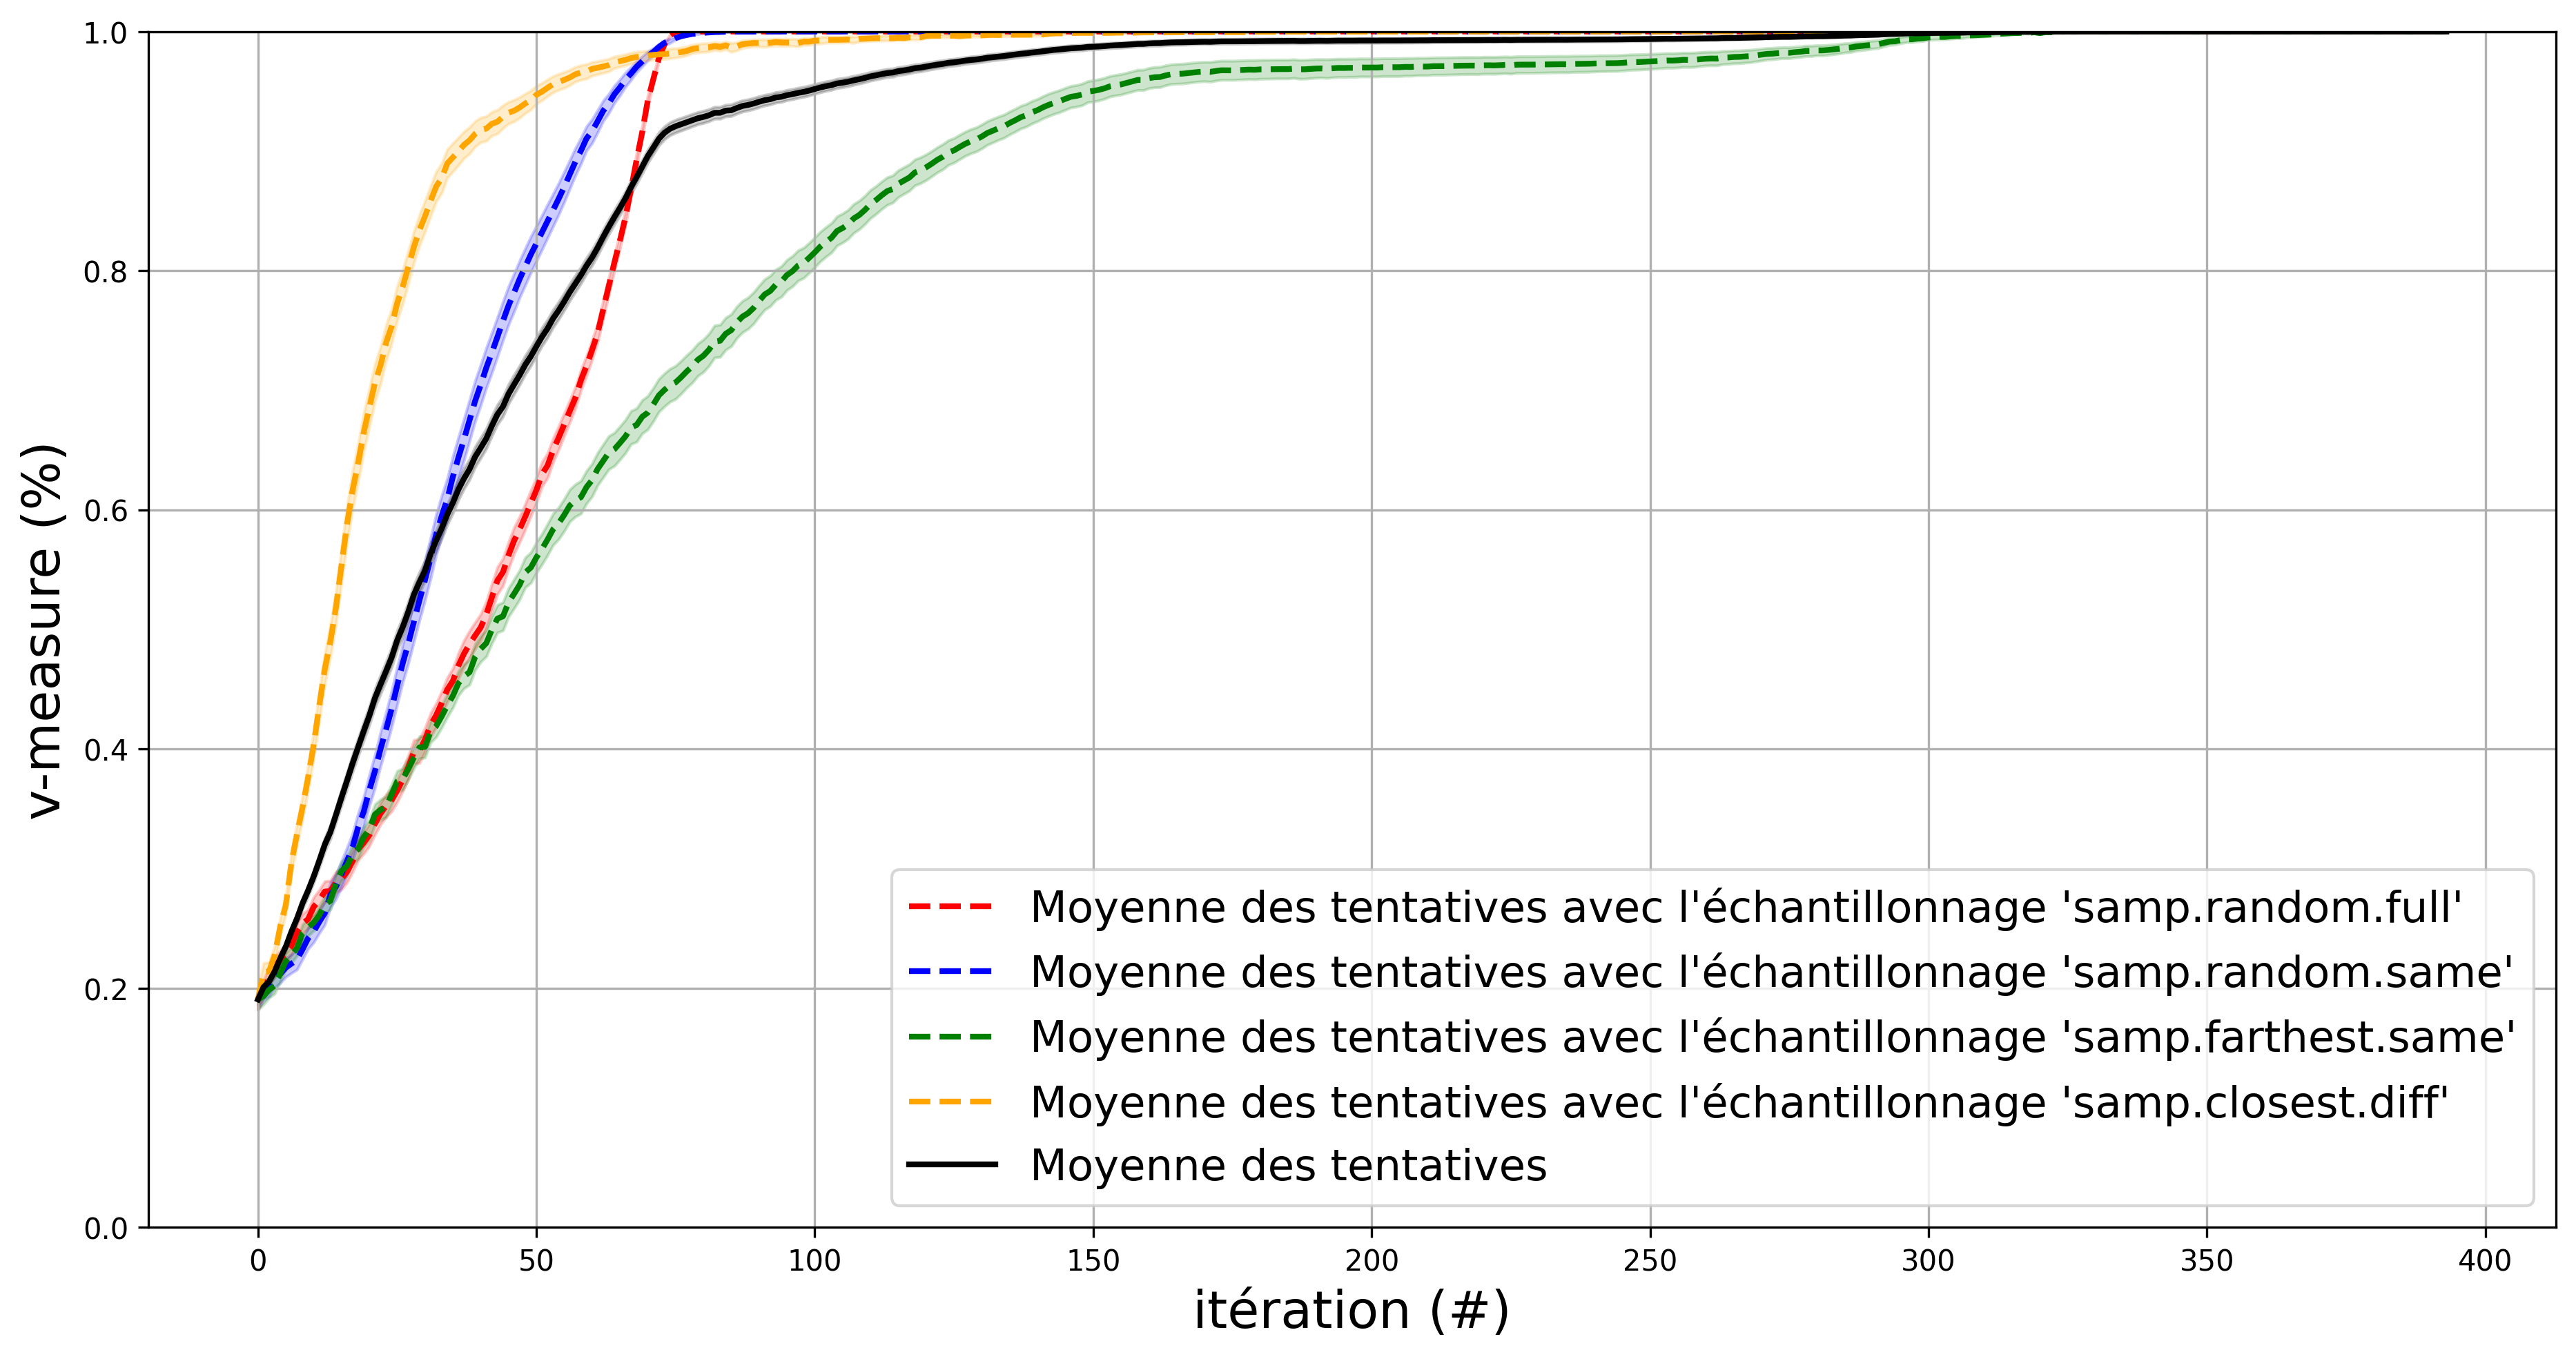

In [46]:
# Create a new figure.
fig_plot_samp: Figure = plt.figure(figsize=(15, 7.5), dpi=300)
axis_plot_samp = fig_plot_samp.gca()

# Set range of axis.
axis_plot_samp.set_ylim(ymin=0, ymax=1)

# Plot average clustering performance evolution for random.
axis_plot_samp.plot(
    [int(iter_plot) for iter_plot in LIST_OF_ITERATIONS],  # x
    [MEAN_convergence_random[iter_mean_plot] for iter_mean_plot in LIST_OF_ITERATIONS],  # y
    label="Moyenne des tentatives avec l'échantillonnage 'samp.random.full'",
    marker="",
    markerfacecolor="red",
    markersize=3,
    color="red",
    linewidth=2,
    linestyle="--",
)
if with_error_bars:
    axis_plot_samp.fill_between(
        x=[int(iter_plot) for iter_plot in LIST_OF_ITERATIONS],  # x
        y1=[(MEAN_convergence_random[iter_errinf_plot] - SEM_convergence_random[iter_errinf_plot]) for iter_errinf_plot in LIST_OF_ITERATIONS],  # y1
        y2=[(MEAN_convergence_random[iter_errsup_plot] + SEM_convergence_random[iter_errsup_plot]) for iter_errsup_plot in LIST_OF_ITERATIONS],  # y2
        color="red",
        alpha=0.2,
    )
# Plot average clustering performance evolution for random-in-same.
axis_plot_samp.plot(
    [int(iter_plot) for iter_plot in LIST_OF_ITERATIONS],  # x
    [MEAN_convergence_in_same[iter_mean_plot] for iter_mean_plot in LIST_OF_ITERATIONS],  # y
    label="Moyenne des tentatives avec l'échantillonnage 'samp.random.same'",
    marker="",
    markerfacecolor="blue",
    markersize=3,
    color="blue",
    linewidth=2,
    linestyle="--",
)
if with_error_bars:
    axis_plot_samp.fill_between(
        x=[int(iter_plot) for iter_plot in LIST_OF_ITERATIONS],  # x
        y1=[(MEAN_convergence_in_same[iter_errinf_plot] - SEM_convergence_in_same[iter_errinf_plot]) for iter_errinf_plot in LIST_OF_ITERATIONS],  # y1
        y2=[(MEAN_convergence_in_same[iter_errsup_plot] + SEM_convergence_in_same[iter_errsup_plot]) for iter_errsup_plot in LIST_OF_ITERATIONS],  # y2
        color="blue",
        alpha=0.2,
    )
# Plot average clustering performance evolution for farthest.
axis_plot_samp.plot(
    [int(iter_plot) for iter_plot in LIST_OF_ITERATIONS],  # x
    [MEAN_convergence_farthest[iter_mean_plot] for iter_mean_plot in LIST_OF_ITERATIONS],  # y
    label="Moyenne des tentatives avec l'échantillonnage 'samp.farthest.same'",
    marker="",
    markerfacecolor="green",
    markersize=3,
    color="green",
    linewidth=2,
    linestyle="--",
)
if with_error_bars:
    axis_plot_samp.fill_between(
        x=[int(iter_plot) for iter_plot in LIST_OF_ITERATIONS],  # x
        y1=[(MEAN_convergence_farthest[iter_errinf_plot] - SEM_convergence_farthest[iter_errinf_plot]) for iter_errinf_plot in LIST_OF_ITERATIONS],  # y1
        y2=[(MEAN_convergence_farthest[iter_errsup_plot] + SEM_convergence_farthest[iter_errsup_plot]) for iter_errsup_plot in LIST_OF_ITERATIONS],  # y2
        color="green",
        alpha=0.2,
    )
# Plot average clustering performance evolution for closest.
axis_plot_samp.plot(
    [int(iter_plot) for iter_plot in LIST_OF_ITERATIONS],  # x
    [MEAN_convergence_closest[iter_mean_plot] for iter_mean_plot in LIST_OF_ITERATIONS],  # y
    label="Moyenne des tentatives avec l'échantillonnage 'samp.closest.diff'",
    marker="",
    markerfacecolor="orange",
    markersize=3,
    color="orange",
    linewidth=2,
    linestyle="--",
)
if with_error_bars:
    axis_plot_samp.fill_between(
        x=[int(iter_plot) for iter_plot in LIST_OF_ITERATIONS],  # x
        y1=[(MEAN_convergence_closest[iter_errinf_plot] - SEM_convergence_closest[iter_errinf_plot]) for iter_errinf_plot in LIST_OF_ITERATIONS],  # y1
        y2=[(MEAN_convergence_closest[iter_errsup_plot] + SEM_convergence_closest[iter_errsup_plot]) for iter_errsup_plot in LIST_OF_ITERATIONS],  # y2
        color="orange",
        alpha=0.2,
    )

# Plot average clustering performance evolution.
axis_plot_samp.plot(
    [int(iter_plot) for iter_plot in LIST_OF_ITERATIONS],  # x
    [MEAN_convergence_ALL[iter_mean_plot] for iter_mean_plot in LIST_OF_ITERATIONS],  # y
    label="Moyenne des tentatives",
    marker="",
    markerfacecolor="black",
    markersize=5,
    color="black",
    linewidth=2,
    linestyle="-",
)
axis_plot_samp.fill_between(
    x=[int(iter_plot) for iter_plot in LIST_OF_ITERATIONS],  # x
    y1=[(MEAN_convergence_ALL[iter_errinf_plot] - SEM_convergence_ALL[iter_errinf_plot]) for iter_errinf_plot in LIST_OF_ITERATIONS],  # y1
    y2=[(MEAN_convergence_ALL[iter_errsup_plot] + SEM_convergence_ALL[iter_errsup_plot]) for iter_errsup_plot in LIST_OF_ITERATIONS],  # y2
    color="black",
    alpha=0.2,
)

# Set axis name.
axis_plot_samp.set_xlabel("itération (#)", fontsize=18,)
axis_plot_samp.set_ylabel("v-measure (%)", fontsize=18,)

# Plot the legend.
axis_plot_samp.legend(fontsize=15,)

# Plot the grid.
axis_plot_samp.grid(True)

In [47]:
# Store the graph.
fig_plot_samp.savefig(
    "../results/etude-convergence-evolution-moyenne-4sampling-par-iteration.png",
    dpi=300,
    transparent=True,
    bbox_inches="tight",
)

Create the figure of MEAN + BEST SETTINGS.

In [48]:
MEAN_convergence_BEST_ANOVA_80, SEM_convergence_BEST_ANOVA_80 = get_MEAN_SEM_of_convergence_evolution(
    local_LIST_OF_ITERATIONS=LIST_OF_ITERATIONS,
    local_LIST_OF_EXPERIMENT_ENVIRONMENTS=[
        env for env in LIST_OF_EXPERIMENT_ENVIRONMENTS
        if ("simple_prep" in env)
        and ("tfidf" in env)
        and ("hier_avg" in env or "hier_sing" in env)
        and ("closest" in env)
    ],
)

In [49]:
MEAN_convergence_BEST_ANOVA_100, SEM_convergence_BEST_ANOVA_100 = get_MEAN_SEM_of_convergence_evolution(
    local_LIST_OF_ITERATIONS=LIST_OF_ITERATIONS,
    local_LIST_OF_EXPERIMENT_ENVIRONMENTS=[
        env for env in LIST_OF_EXPERIMENT_ENVIRONMENTS
        if ("lemma_prep" in env)
        and ("tfidf" in env)
        and ("kmeans_COP" in env)
        and ("closest" in env)
    ],
)

In [50]:
MEAN_convergence_BEST_ANOVA_MAX, SEM_convergence_BEST_ANOVA_MAX = get_MEAN_SEM_of_convergence_evolution(
    local_LIST_OF_ITERATIONS=LIST_OF_ITERATIONS,
    local_LIST_OF_EXPERIMENT_ENVIRONMENTS=[
        env for env in LIST_OF_EXPERIMENT_ENVIRONMENTS
        if ("lemma_prep" in env)
        and ("tfidf" in env)
        and ("kmeans_COP" in env)
        and ("in_same" in env)
    ],
)

In [51]:
with_error_bars = True

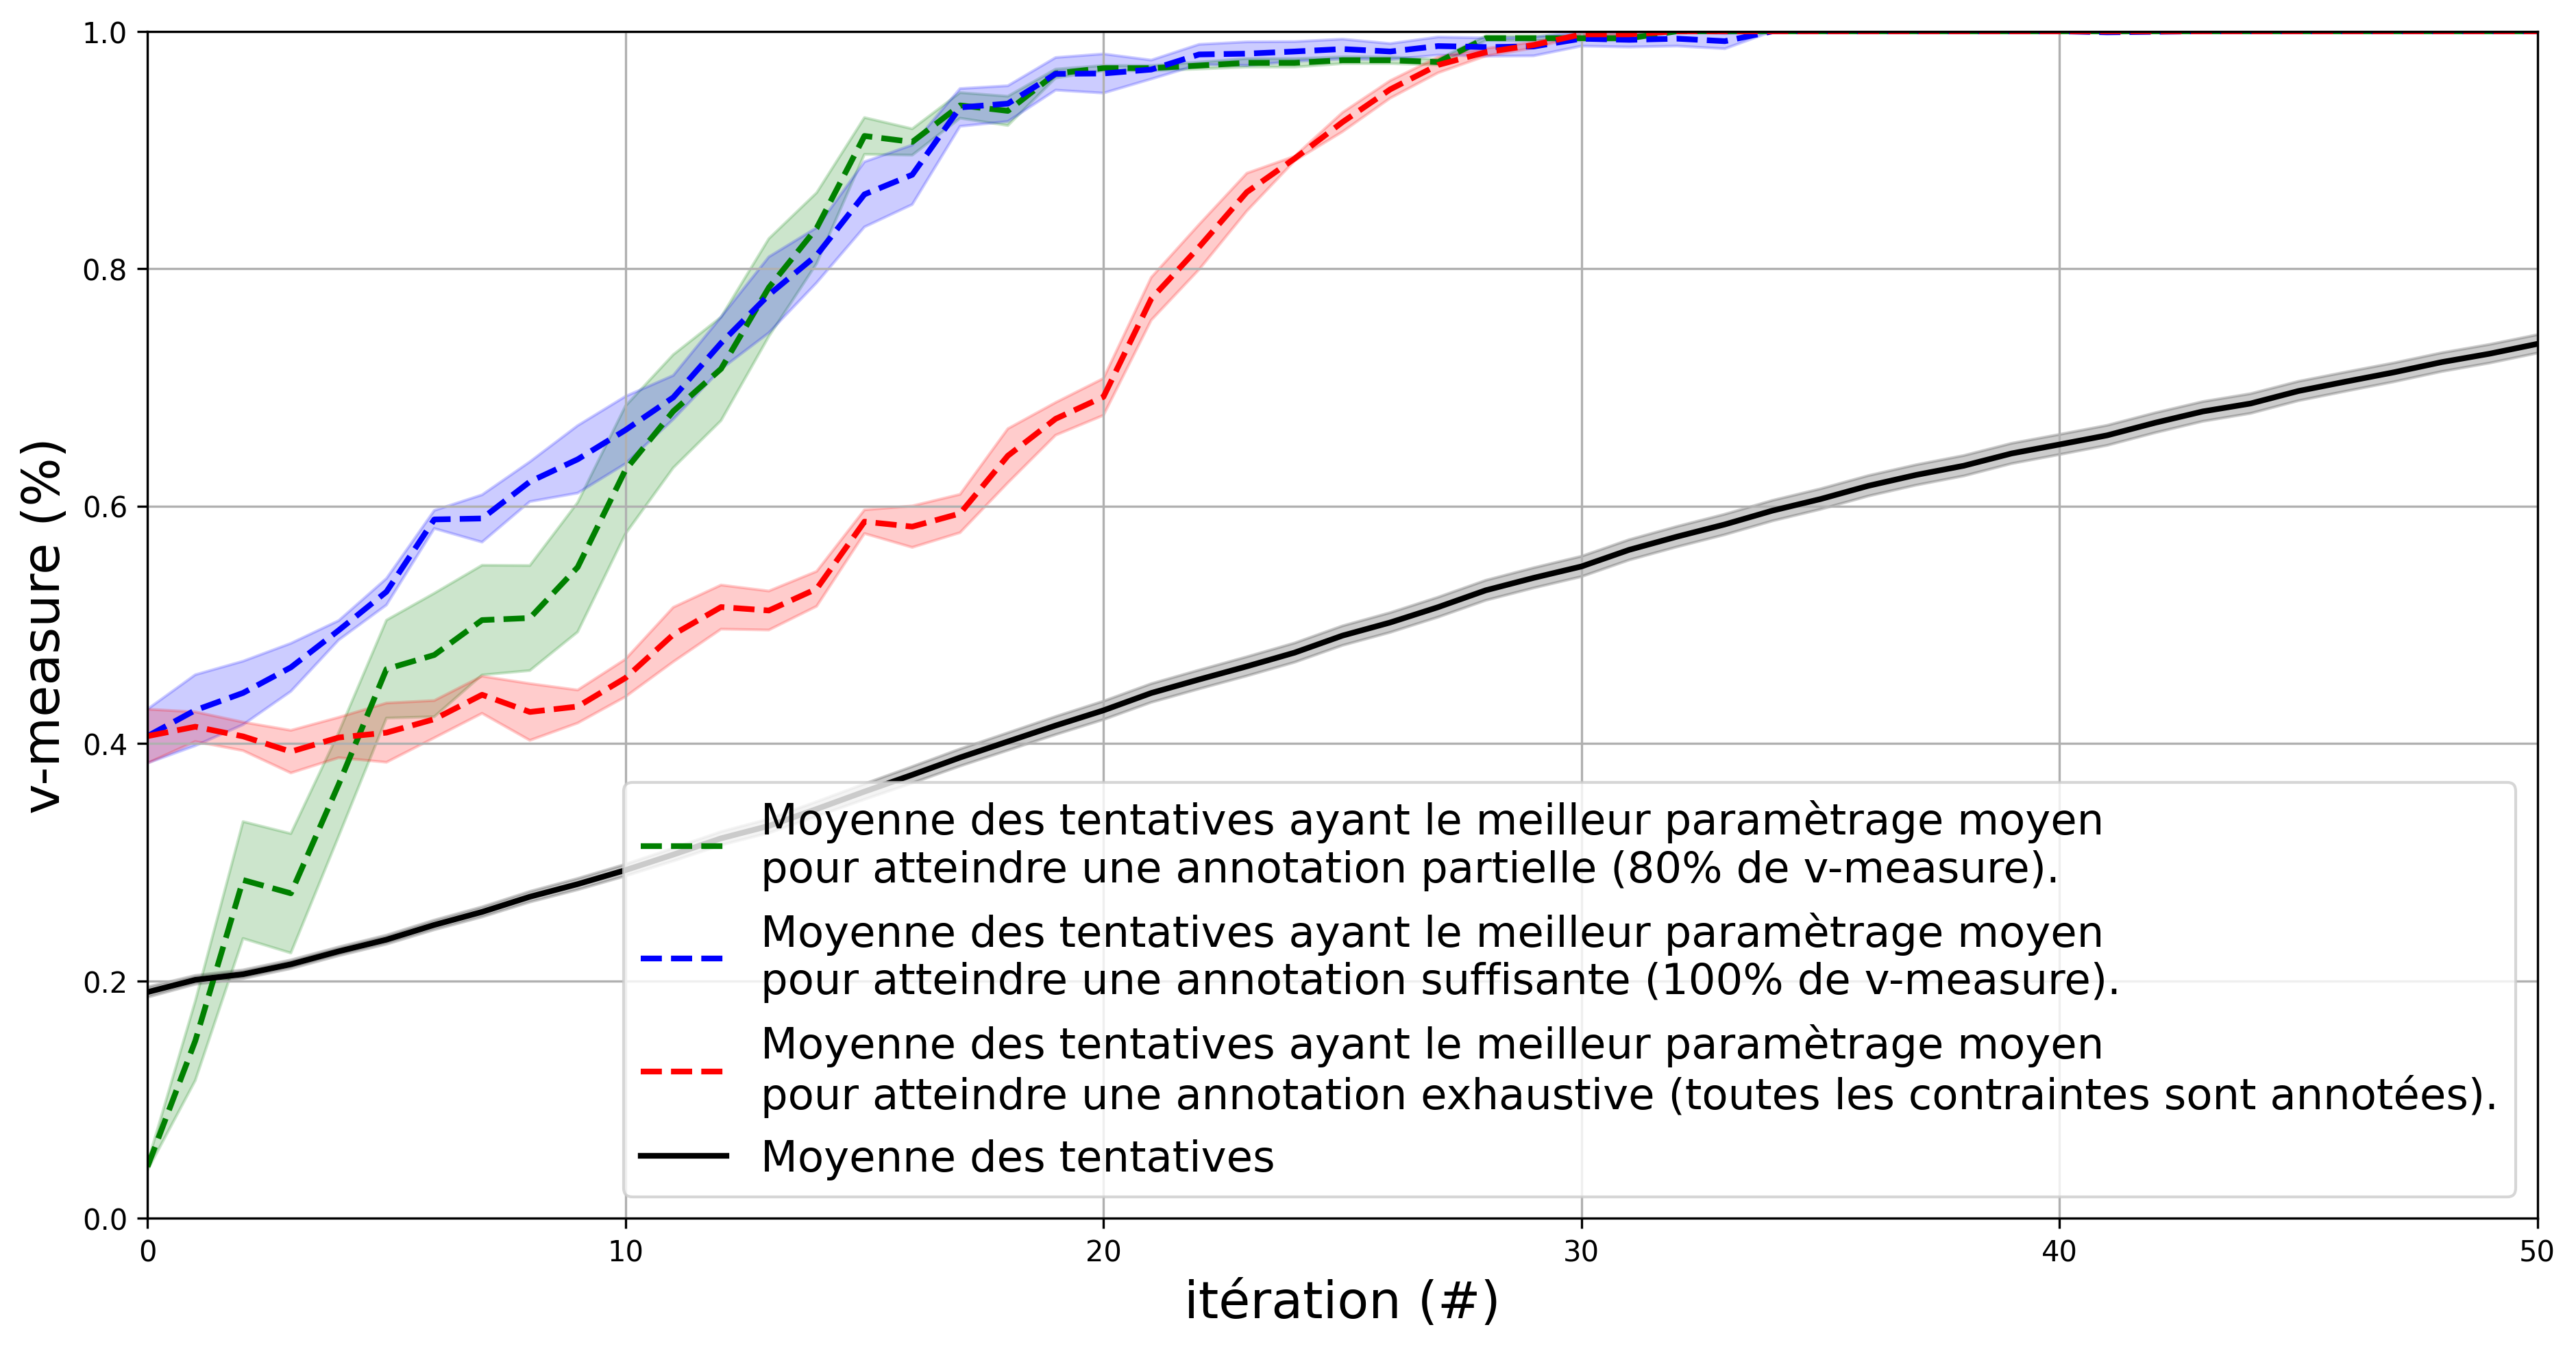

In [52]:
# Create a new figure.
fig_plot_best_anova: Figure = plt.figure(figsize=(15, 7.5), dpi=300)
axis_plot_best_anova = fig_plot_best_anova.gca()

# Set range of axis.
axis_plot_best_anova.set_xlim(xmin=0, xmax=50)
axis_plot_best_anova.set_ylim(ymin=0, ymax=1)

# Plot average clustering performance evolution to reach 80% of vmeasure.
axis_plot_best_anova.plot(
    [int(iter_plot) for iter_plot in LIST_OF_ITERATIONS],  # x
    [MEAN_convergence_BEST_ANOVA_80[iter_mean_plot] for iter_mean_plot in LIST_OF_ITERATIONS],  # y
    label="Moyenne des tentatives ayant le meilleur paramètrage moyen\npour atteindre une annotation partielle (80% de v-measure).",
    marker="",
    markerfacecolor="green",
    markersize=3,
    color="green",
    linewidth=2,
    linestyle="--",
)
if with_error_bars:
    axis_plot_best_anova.fill_between(
        x=[int(iter_plot) for iter_plot in LIST_OF_ITERATIONS],  # x
        y1=[(MEAN_convergence_BEST_ANOVA_80[iter_errinf_plot] - SEM_convergence_BEST_ANOVA_80[iter_errinf_plot]) for iter_errinf_plot in LIST_OF_ITERATIONS],  # y1
        y2=[(MEAN_convergence_BEST_ANOVA_80[iter_errsup_plot] + SEM_convergence_BEST_ANOVA_80[iter_errsup_plot]) for iter_errsup_plot in LIST_OF_ITERATIONS],  # y2
        color="green",
        alpha=0.2,
    )
# Plot average clustering performance evolution to reach 100% of vmeasure.
axis_plot_best_anova.plot(
    [int(iter_plot) for iter_plot in LIST_OF_ITERATIONS],  # x
    [MEAN_convergence_BEST_ANOVA_100[iter_mean_plot] for iter_mean_plot in LIST_OF_ITERATIONS],  # y
    label="Moyenne des tentatives ayant le meilleur paramètrage moyen\npour atteindre une annotation suffisante (100% de v-measure).",
    marker="",
    markerfacecolor="blue",
    markersize=3,
    color="blue",
    linewidth=2,
    linestyle="--",
)
if with_error_bars:
    axis_plot_best_anova.fill_between(
        x=[int(iter_plot) for iter_plot in LIST_OF_ITERATIONS],  # x
        y1=[(MEAN_convergence_BEST_ANOVA_100[iter_errinf_plot] - SEM_convergence_BEST_ANOVA_100[iter_errinf_plot]) for iter_errinf_plot in LIST_OF_ITERATIONS],  # y1
        y2=[(MEAN_convergence_BEST_ANOVA_100[iter_errsup_plot] + SEM_convergence_BEST_ANOVA_100[iter_errsup_plot]) for iter_errsup_plot in LIST_OF_ITERATIONS],  # y2
        color="blue",
        alpha=0.2,
    )
# Plot average clustering performance evolution to reach constraints completude.
axis_plot_best_anova.plot(
    [int(iter_plot) for iter_plot in LIST_OF_ITERATIONS],  # x
    [MEAN_convergence_BEST_ANOVA_MAX[iter_mean_plot] for iter_mean_plot in LIST_OF_ITERATIONS],  # y
    label="Moyenne des tentatives ayant le meilleur paramètrage moyen\npour atteindre une annotation exhaustive (toutes les contraintes sont annotées).",
    marker="",
    markerfacecolor="red",
    markersize=3,
    color="red",
    linewidth=2,
    linestyle="--",
)
if with_error_bars:
    axis_plot_best_anova.fill_between(
        x=[int(iter_plot) for iter_plot in LIST_OF_ITERATIONS],  # x
        y1=[(MEAN_convergence_BEST_ANOVA_MAX[iter_errinf_plot] - SEM_convergence_BEST_ANOVA_MAX[iter_errinf_plot]) for iter_errinf_plot in LIST_OF_ITERATIONS],  # y1
        y2=[(MEAN_convergence_BEST_ANOVA_MAX[iter_errsup_plot] + SEM_convergence_BEST_ANOVA_MAX[iter_errsup_plot]) for iter_errsup_plot in LIST_OF_ITERATIONS],  # y2
        color="red",
        alpha=0.2,
    )

# Plot average clustering performance evolution.
axis_plot_best_anova.plot(
    [int(iter_plot) for iter_plot in LIST_OF_ITERATIONS],  # x
    [MEAN_convergence_ALL[iter_mean_plot] for iter_mean_plot in LIST_OF_ITERATIONS],  # y
    label="Moyenne des tentatives",
    marker="",
    markerfacecolor="black",
    markersize=5,
    color="black",
    linewidth=2,
    linestyle="-",
)
axis_plot_best_anova.fill_between(
    x=[int(iter_plot) for iter_plot in LIST_OF_ITERATIONS],  # x
    y1=[(MEAN_convergence_ALL[iter_errinf_plot] - SEM_convergence_ALL[iter_errinf_plot]) for iter_errinf_plot in LIST_OF_ITERATIONS],  # y1
    y2=[(MEAN_convergence_ALL[iter_errsup_plot] + SEM_convergence_ALL[iter_errsup_plot]) for iter_errsup_plot in LIST_OF_ITERATIONS],  # y2
    color="black",
    alpha=0.2,
)

# Set axis name.
axis_plot_best_anova.set_xlabel("itération (#)", fontsize=18,)
axis_plot_best_anova.set_ylabel("v-measure (%)", fontsize=18,)

# Plot the legend.
axis_plot_best_anova.legend(fontsize=15,)

# Plot the grid.
axis_plot_best_anova.grid(True)

In [53]:
# Store the graph.
fig_plot_best_anova.savefig(
    "../results/etude-convergence-evolution-moyenne-5best-par-iteration.png",
    dpi=300,
    transparent=True,
    bbox_inches="tight",
)

-----

## [DRAFT] Test usage in PhD Report

In [ ]:
# Définir les données.
dict_of_texts = {
    "0": "Comment signaler un vol de carte bancaire ?",
    "1": "J'ai égaré ma carte bancaire, que faire ?",
    "2": "J'ai perdu ma carte de paiement",
    "3": "Le distributeur a avalé ma carte !",
    "4": "En retirant de l'argent, le GAB a gardé ma carte...",
    "5": "Le distributeur ne m'a pas rendu ma carte bleue.",
    # ...
    "N": "Pourquoi le sans contact ne fonctionne pas ?",
}

In [ ]:
# Import des dépendances.
from cognitivefactory.interactive_clustering.utils.preprocessing import preprocess
from cognitivefactory.interactive_clustering.utils.vectorization import vectorize

# Prétraitement des données.
dict_of_preprocess_texts = preprocess(
    dict_of_texts=dict_of_texts,
    apply_stopwords_deletion=False,
    apply_parsing_filter=False,
    apply_lemmatization=False,
    spacy_language_model="fr_core_news_md",
)
"""
    {"0": "comment signaler un vol de carte bancaire",
     "1": "j ai egare ma carte bancaire, que faire",
     "2": "j ai perdu ma carte de paiement",
     "3": "le distributeur a avale ma carte",
     "4": "en retirant de l argent le gab a garde ma carte",
     "5": "le distributeur ne m a pas rendu ma carte bleue",
     # ...
     "N": "pourquoi le sans contact ne fonctionne pas"}
"""

# Vectorisation des données.
dict_of_vectors = vectorize(
    dict_of_texts=dict_of_preprocess_texts,
    vectorizer_type="tfidf",
)

In [ ]:
# Import des dépendances.
from cognitivefactory.interactive_clustering.constraints.factory import managing_factory

# Création du gestionnaire de contraintes.
constraints_manager = managing_factory(
    manager="binary",
    list_of_data_IDs = list(dict_of_texts.keys()),  # ["0", "1", "2", "3", "4", "5", ..., "N"]
)

# Ajout de contraintes.
constraints_manager.add_constraint(
	data_ID1="0",  # "Comment signaler un vol de carte bancaire ?"
	data_ID2="1",  # "J'ai égaré ma carte bancaire, que faire ?"
	constraint_type="MUST_LINK",
)
constraints_manager.add_constraint(
	data_ID1="3",  # "Le distributeur a avalé ma carte !"
	data_ID2="4",  # "En retirant de l'argent, le GAB a gardé ma carte..."
	constraint_type="MUST_LINK",
)
constraints_manager.add_constraint(
	data_ID1="0",  # "Comment signaler un vol de carte bancaire ?"
	data_ID2="N",  # "Pourquoi le sans contact ne fonctionne pas ?"
	constraint_type="CANNOT_LINK",
)
    # NB: ajouter une contrainte "MUST_LINK" entre "1" et "N" lèverait une erreur.

constraints_manager.get_connected_components()
"""
	[['0', '1'],
	 ['2'],
	 ['3', '4'],
	 ['5'],
	 ['N']]
"""

In [ ]:
# Import des dépendances.
from cognitivefactory.interactive_clustering.clustering.factory import clustering_factory

# Initialiser un objet de clustering.
clustering_model = clustering_factory(
    algorithm="kmeans",
    model="COP",
    random_seed=42,
)

# Lancer le clustering.
clustering_result = clustering_model.cluster(
    constraints_manager=constraints_manager,
    nb_clusters=2,
    vectors=dict_of_vectors,
)
"""
    {"0": 0,  # "comment signaler un vol de carte bancaire"
     "1": 0,  # "j ai egare ma carte bancaire, que faire"
     "2": 0,  # "j ai perdu ma carte de paiement"
     "3": 1,  # "le distributeur a avale ma carte"
     "4": 1,  # "en retirant de l argent le gab a garde ma carte"
     "5": 1,  # "le distributeur ne m a pas rendu ma carte bleue"
     # ...
     "N": 1}  # "pourquoi le sans contact ne fonctionne pas"
"""

In [ ]:
# Import des dépendances.
from cognitivefactory.interactive_clustering.sampling.factory import sampling_factory

# Initialiser un objet d'échantillonnage.
sampler = sampling_factory(
	algorithm="random",
    random_seed=42,
)

# Run sampling.
selection = sampler.sample(
	constraints_manager=constraints_manager,
	nb_to_select=2,
	clustering_result=clustering_result,  # optionnel pour "random"
	vectors=dict_of_vectors,  # optionnel pour "random"
)
"""
	[("0", '5"),  # "Comment signaler un vol de carte bancaire ?" vs "Le distributeur ne m'a pas rendu ma carte bleue."
	 ("0", '2"),  # "Comment signaler un vol de carte bancaire ?" vs "J'ai perdu ma carte de paiement"
	 ("2", 'N")]  # "J'ai perdu ma carte de paiement" vs "Pourquoi le sans contact ne fonctionne pas ?"
"""